In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import inspect, re

In [2]:
def generate_label(f):
    # Get the source code of the lambda function
    s = inspect.getsource(f)    
    lambda_str = s.split(':', 1)[-1].split(',', 1)[0]
    return lambda_str

In [3]:
create_array = lambda start, step, count: np.arange(start, start + step * count, step)

In [17]:
def plot(f, p):
    # Generate x values for the plot
    x = np.linspace(0, 50, 1000)

    # Determine the number of rows needed for the grid
    num_functions = len(f)
    num_cols = 3
    num_rows = (num_functions + num_cols - 1) // num_cols  # Ceiling division to get the number of rows

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4), sharex=True, sharey=True)

    # Flatten the axs array for easy indexing
    axs = axs.flatten()

    # Plot each function in its own subplot
    for i, func in enumerate(f):
        ax = axs[i]
        for value in p:
            y = func(x, value)
            ax.plot(x, y, label=f'p = {value}')
        
        # Generate LaTeX label for the function
        label = generate_label(func)

        # Add labels and title for each subplot
        ax.set_title(f'Function f{i+1}: {label}'[:50])
        ax.set_xlabel('x')
        ax.set_ylabel('Function value')
        ax.legend()
        ax.set_aspect('equal')
        ax.grid(True)

    # Turn off axes for any unused subplots
    for j in range(num_functions, len(axs)):
        axs[j].axis('off')

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

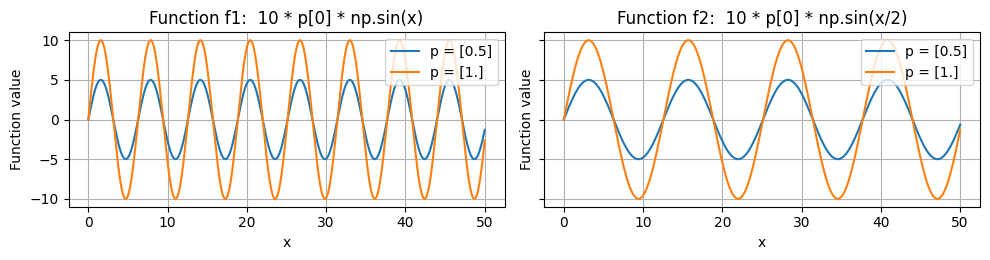

In [15]:
# List of functions defined using lambda expressions
f = [
    lambda x, p: 10 * p[0] * np.sin(x),
    lambda x, p: 10 * p[0] * np.sin(x/2),
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.5, 1.5, 0.5),
    ])

plot(f, p)

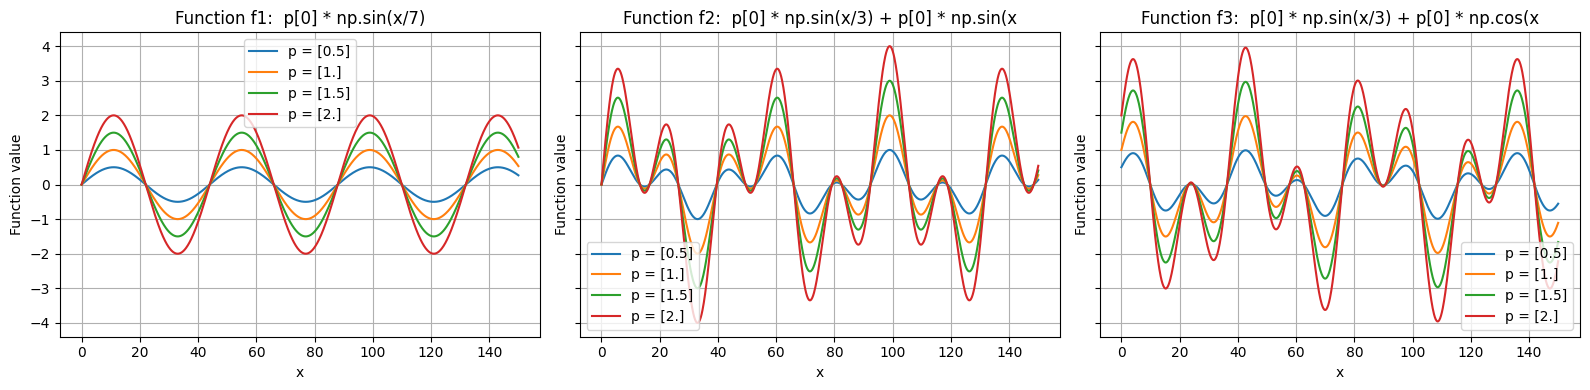

In [134]:
# List of functions defined using lambda expressions
f = [
    lambda x, p: p[0] * np.sin(x/7),
    lambda x, p: p[0] * np.sin(x/3) + p[0] * np.sin(x/7),
    lambda x, p: p[0] * np.sin(x/3) + p[0] * np.cos(x/7),
]

# Define the p values to iterate over
p = np.column_stack([
    create_array(0.5, 0.5, 4)
    ])

plot(f, p)

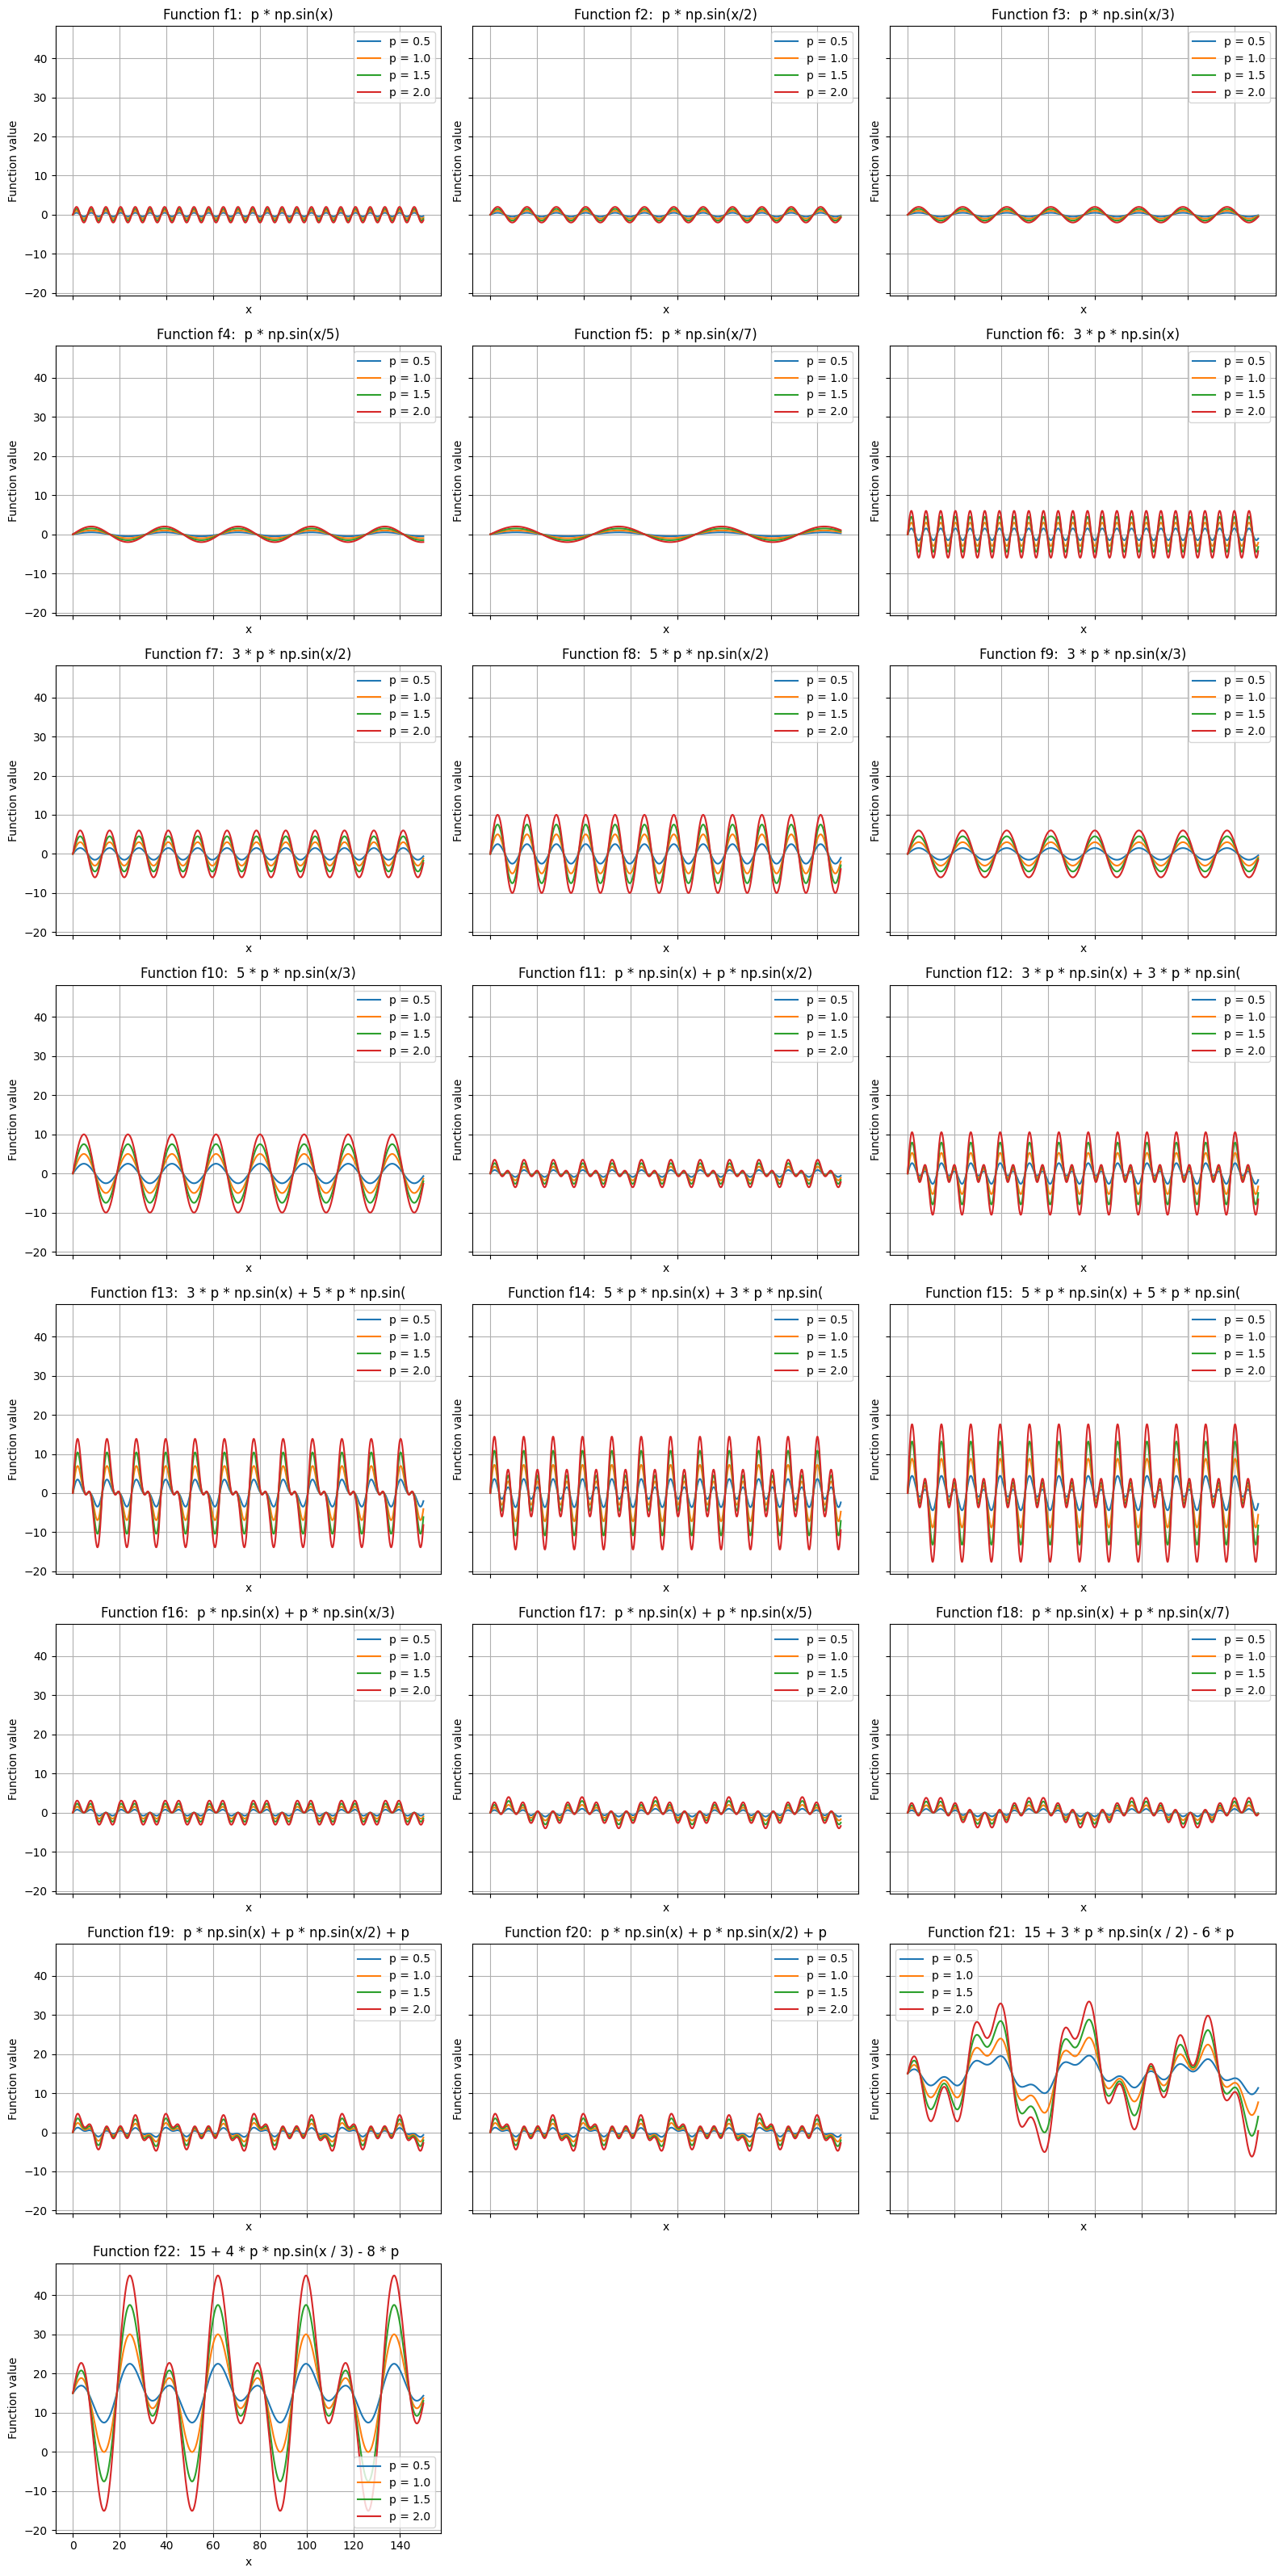

In [110]:
# List of functions defined using lambda expressions
f = [
    lambda x, p: p * np.sin(x),
    lambda x, p: p * np.sin(x/2),
    lambda x, p: p * np.sin(x/3),
    lambda x, p: p * np.sin(x/5),
    lambda x, p: p * np.sin(x/7),
    lambda x, p: 3 * p * np.sin(x),
    lambda x, p: 3 * p * np.sin(x/2),
    lambda x, p: 5 * p * np.sin(x/2),
    lambda x, p: 3 * p * np.sin(x/3),
    lambda x, p: 5 * p * np.sin(x/3),
    lambda x, p: p * np.sin(x) + p * np.sin(x/2),
    lambda x, p: 3 * p * np.sin(x) + 3 * p * np.sin(x/2),
    lambda x, p: 3 * p * np.sin(x) + 5 * p * np.sin(x/2),
    lambda x, p: 5 * p * np.sin(x) + 3 * p * np.sin(x/2),
    lambda x, p: 5 * p * np.sin(x) + 5 * p * np.sin(x/2),
    lambda x, p: p * np.sin(x) + p * np.sin(x/3),
    lambda x, p: p * np.sin(x) + p * np.sin(x/5),
    lambda x, p: p * np.sin(x) + p * np.sin(x/7),
    lambda x, p: p * np.sin(x) + p * np.sin(x/2) + p * np.sin(x/3),
    lambda x, p: p * np.sin(x) + p * np.sin(x/2) + p * np.sin(x/3),
    lambda x, p: 15 + 3 * p * np.sin(x / 2) - 6 * p * np.sin(x / 7) + 3 * p * np.sin(x / 5),
    lambda x, p: 15 + 4 * p * np.sin(x / 3) - 8 * p * np.sin(x / 6) + 5 * p * np.sin(x / 3),
]

# Define the p values to iterate over
p = np.arange(0.5, 2.5, 0.5)

plot(f, p)

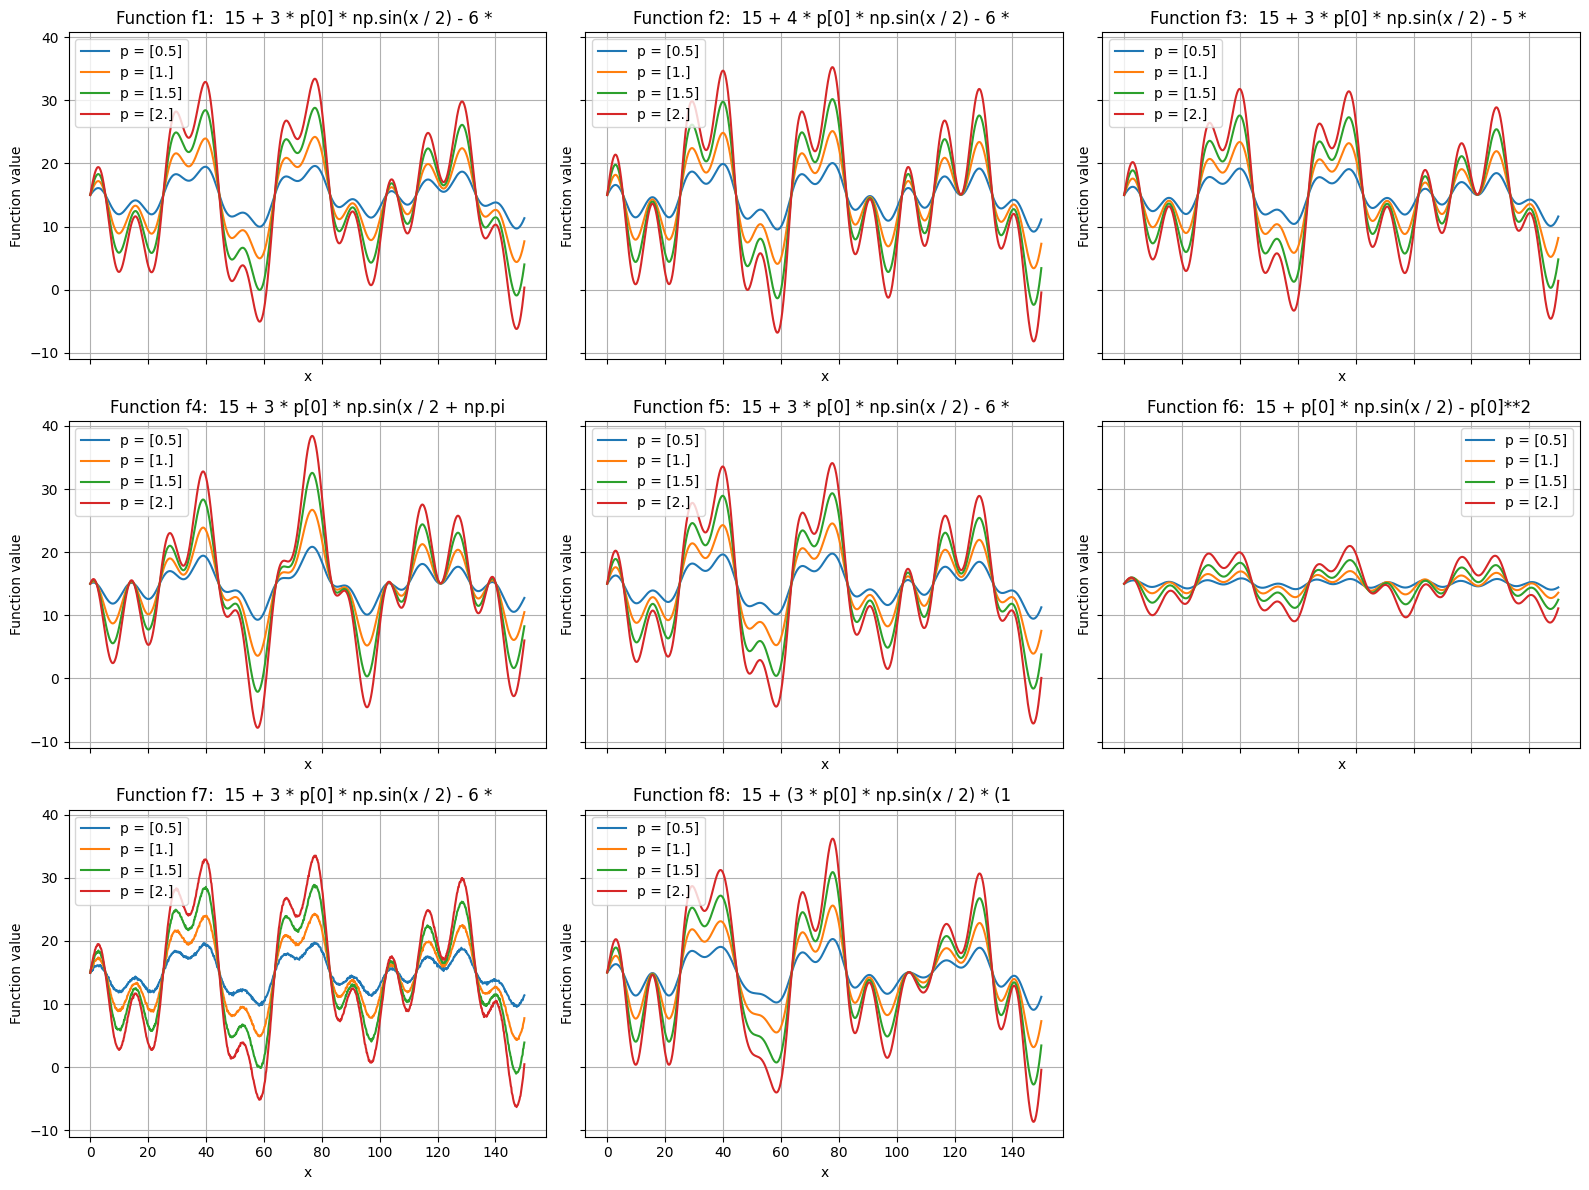

In [111]:
f = [
    # Base function
    lambda x, p: 15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5),

    # Variant 1: Increase amplitude of first term
    lambda x, p: 15 + 4 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5),

    # Variant 2: Decrease amplitude of second term
    lambda x, p: 15 + 3 * p[0] * np.sin(x / 2) - 5 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5),

    # Variant 3: Add a phase shift to the first and third terms
    lambda x, p: 15 + 3 * p[0] * np.sin(x / 2 + np.pi / 4) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5 - np.pi / 4),

    # Variant 6: Introduce additional sine component with small amplitude
    lambda x, p: 15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5) + 0.5 * p[0] * np.sin(x / 3),

    # Variant 7: Use non-linear effects with quadratic terms
    lambda x, p: 15 + p[0] * np.sin(x / 2) - p[0]**2 * np.sin(x / 7) + (p[0] / 2) * np.sin(x / 5),

    # Variant 8: Random noise term to add perturbation
    lambda x, p: 15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5) + 0.1 * np.random.randn(*x.shape),

    # Variant 9: Amplitude modulation with a sinusoidal factor
    lambda x, p: 15 + (3 * p[0] * np.sin(x / 2) * (1 + 0.5 * np.sin(x / 10))) - (6 * p[0] * np.sin(x / 7)) + (3 * p[0] * np.sin(x / 5)),
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.5, 2.5, 0.5),
    ])

plot(f, p)

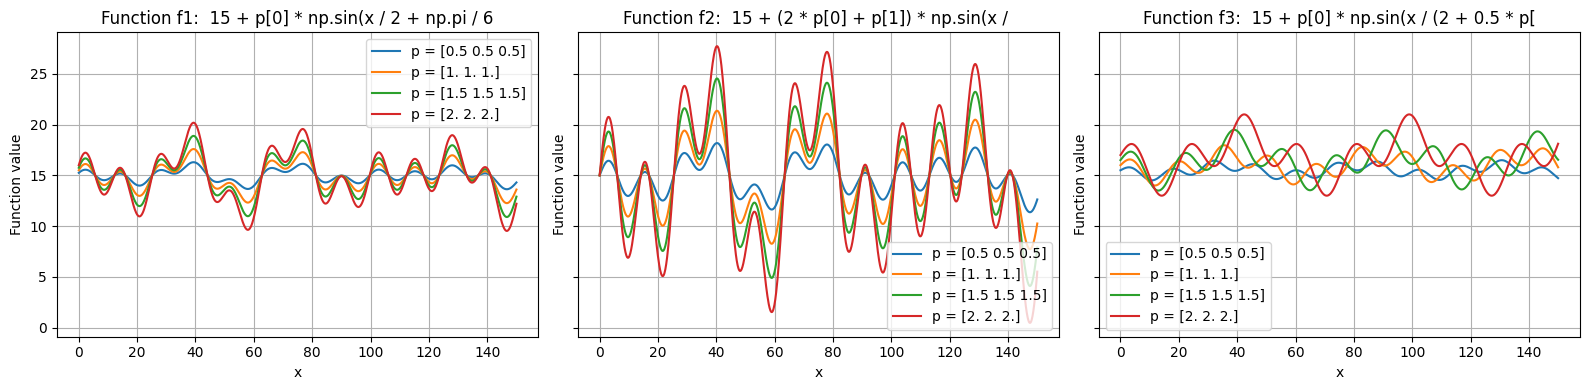

In [125]:
f = [
    # Variant 4: Add a phase shift and change amplitude of all terms
    lambda x, p: 15 + p[0] * np.sin(x / 2 + np.pi / 6) - p[1] * np.sin(x / 7) + p[2] * np.sin(x / 5),


    # Variant 5: Use weighted combination of parameters
    lambda x, p: 15 + (2 * p[0] + p[1]) * np.sin(x / 2) - (p[1] + 2 * p[2]) * np.sin(x / 7) + (p[0] + p[2]) * np.sin(x / 5),
    # Variant 10: Modulate amplitude and frequency with parameters
    lambda x, p: 15 + p[0] * np.sin(x / (2 + 0.5 * p[1])) - p[1] * np.sin(x / (7 + p[2])) + p[0]
]

# Define the p values to iterate over
p = np.column_stack([
    create_array(0.5, 0.5, 4),
    create_array(0.5, 0.5, 4),
    create_array(0.5, 0.5, 4),
    ])

plot(f, p)

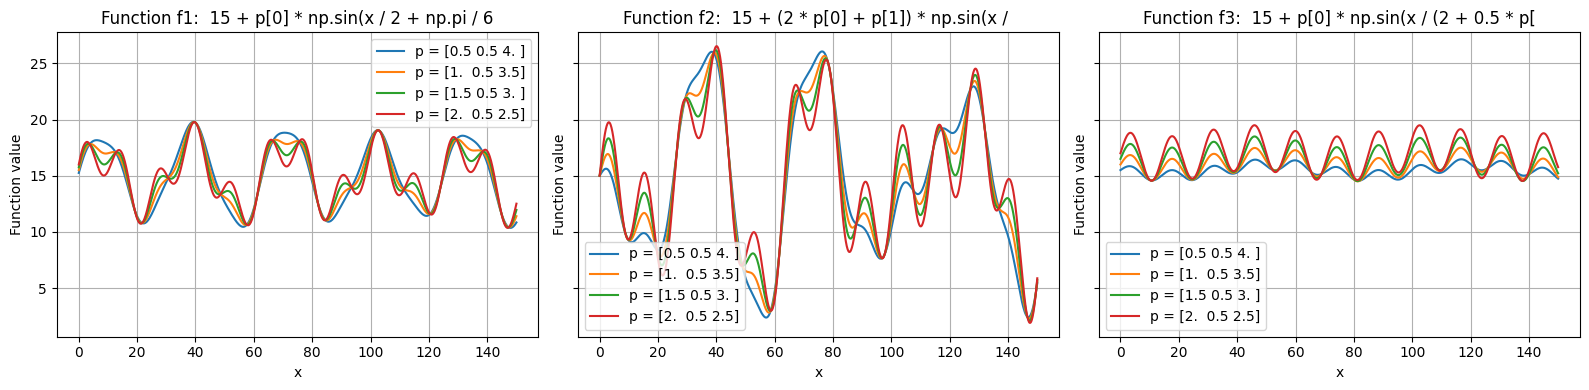

In [129]:
f = [
    # Variant 4: Add a phase shift and change amplitude of all terms
    lambda x, p: 15 + p[0] * np.sin(x / 2 + np.pi / 6) - p[1] * np.sin(x / 7) + p[2] * np.sin(x / 5),

    # Variant 5: Use weighted combination of parameters
    lambda x, p: 15 + (2 * p[0] + p[1]) * np.sin(x / 2) - (p[1] + 2 * p[2]) * np.sin(x / 7) + (p[0] + p[2]) * np.sin(x / 5),

    # Variant 10: Modulate amplitude and frequency with parameters
    lambda x, p: 15 + p[0] * np.sin(x / (2 + 0.5 * p[1])) - p[1] * np.sin(x / (7 + p[2])) + p[0]
]

# Define the p values to iterate over
p = np.column_stack([
    create_array(0.5, 0.5, 4),
    [0.5] * 4,
    create_array(4, -0.5, 4),
    ])

plot(f, p)

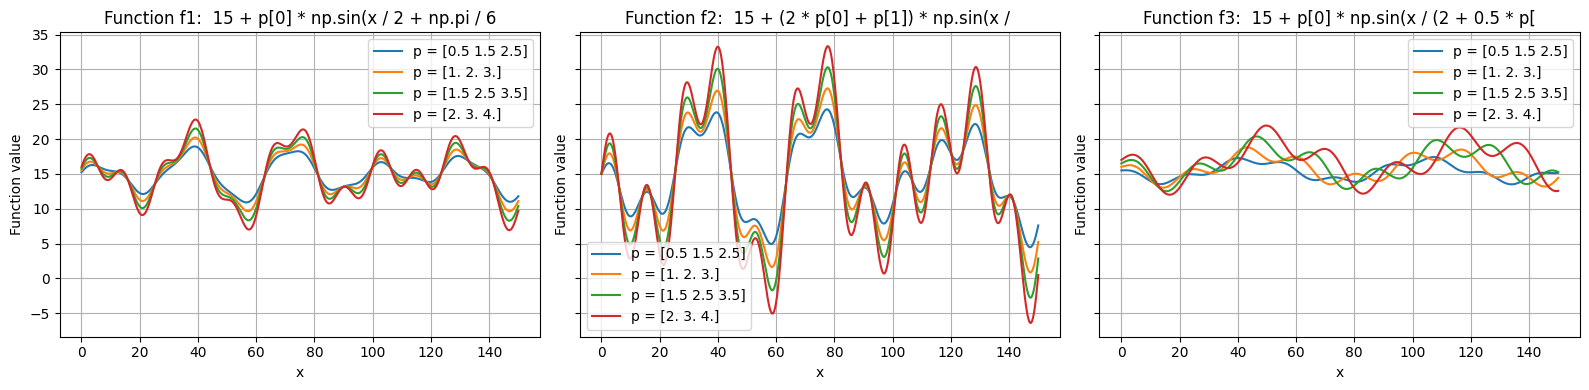

In [119]:
f = [
    # Variant 4: Add a phase shift and change amplitude of all terms
    lambda x, p: 15 + p[0] * np.sin(x / 2 + np.pi / 6) - p[1] * np.sin(x / 7) + p[2] * np.sin(x / 5),

    # Variant 5: Use weighted combination of parameters
    lambda x, p: 15 + (2 * p[0] + p[1]) * np.sin(x / 2) - (p[1] + 2 * p[2]) * np.sin(x / 7) + (p[0] + p[2]) * np.sin(x / 5),

    # Variant 10: Modulate amplitude and frequency with parameters
    lambda x, p: 15 + p[0] * np.sin(x / (2 + 0.5 * p[1])) - p[1] * np.sin(x / (7 + p[2])) + p[0]
]

# Define the p values to iterate over
p = np.column_stack([
    create_array(0.5, 0.5, 4),
    create_array(1.5, 0.5, 4),
    create_array(2.5, 0.5, 4),
    ])

plot(f, p)

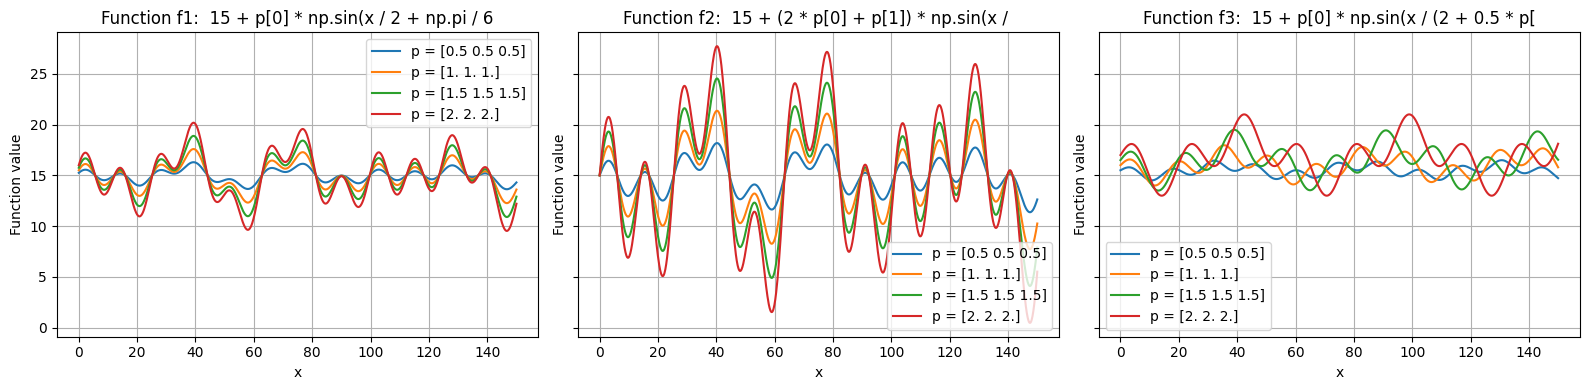

In [282]:
f = [
    # Variant 4: Add a phase shift and change amplitude of all terms
    lambda x, p: 15 + p[0] * np.sin(x / 2 + np.pi / 6) - p[1] * np.sin(x / 7) + p[2] * np.sin(x / 5),

    # Variant 5: Use weighted combination of parameters
    lambda x, p: 15 + (2 * p[0] + p[1]) * np.sin(x / 2) - (p[1] + 2 * p[2]) * np.sin(x / 7) + (p[0] + p[2]) * np.sin(x / 5),

    # Variant 10: Modulate amplitude and frequency with parameters
    lambda x, p: 15 + p[0] * np.sin(x / (2 + 0.5 * p[1])) - p[1] * np.sin(x / (7 + p[2])) + p[0]
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.5, 2.5, 0.5),
    np.arange(0.5, 2.5, 0.5),
    np.arange(0.5, 2.5, 0.5),
    ])

plot(f, p)

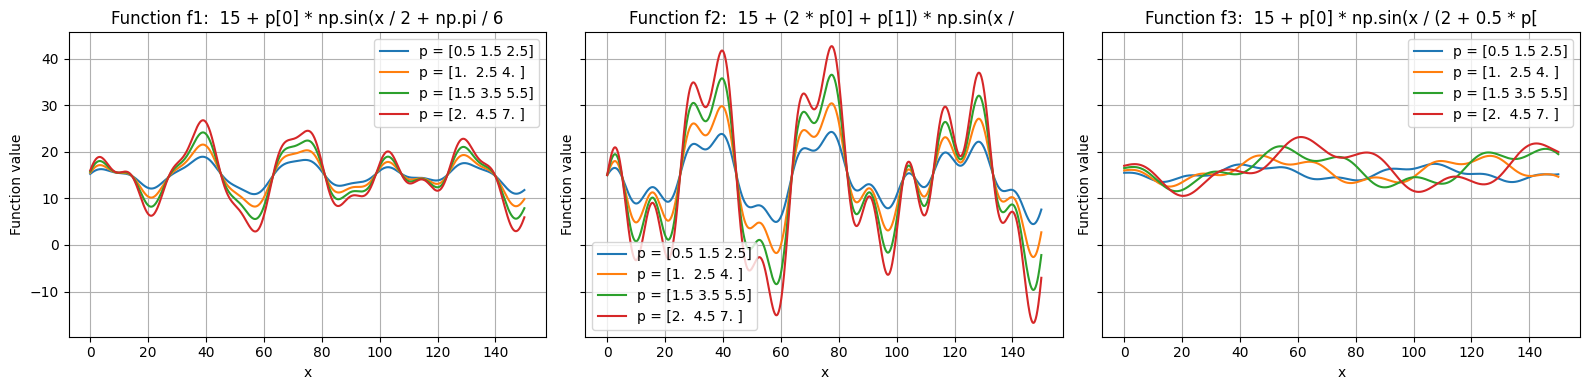

In [120]:
f = [
    # Variant 4: Add a phase shift and change amplitude of all terms
    lambda x, p: 15 + p[0] * np.sin(x / 2 + np.pi / 6) - p[1] * np.sin(x / 7) + p[2] * np.sin(x / 5),

    # Variant 5: Use weighted combination of parameters
    lambda x, p: 15 + (2 * p[0] + p[1]) * np.sin(x / 2) - (p[1] + 2 * p[2]) * np.sin(x / 7) + (p[0] + p[2]) * np.sin(x / 5),

    # Variant 10: Modulate amplitude and frequency with parameters
    lambda x, p: 15 + p[0] * np.sin(x / (2 + 0.5 * p[1])) - p[1] * np.sin(x / (7 + p[2])) + p[0]
]

# Define the p values to iterate over
p = np.column_stack([
    create_array(0.5, 0.5, 4),
    create_array(1.5, 1, 4),
    create_array(2.5, 1.5, 4),
    ])

plot(f, p)

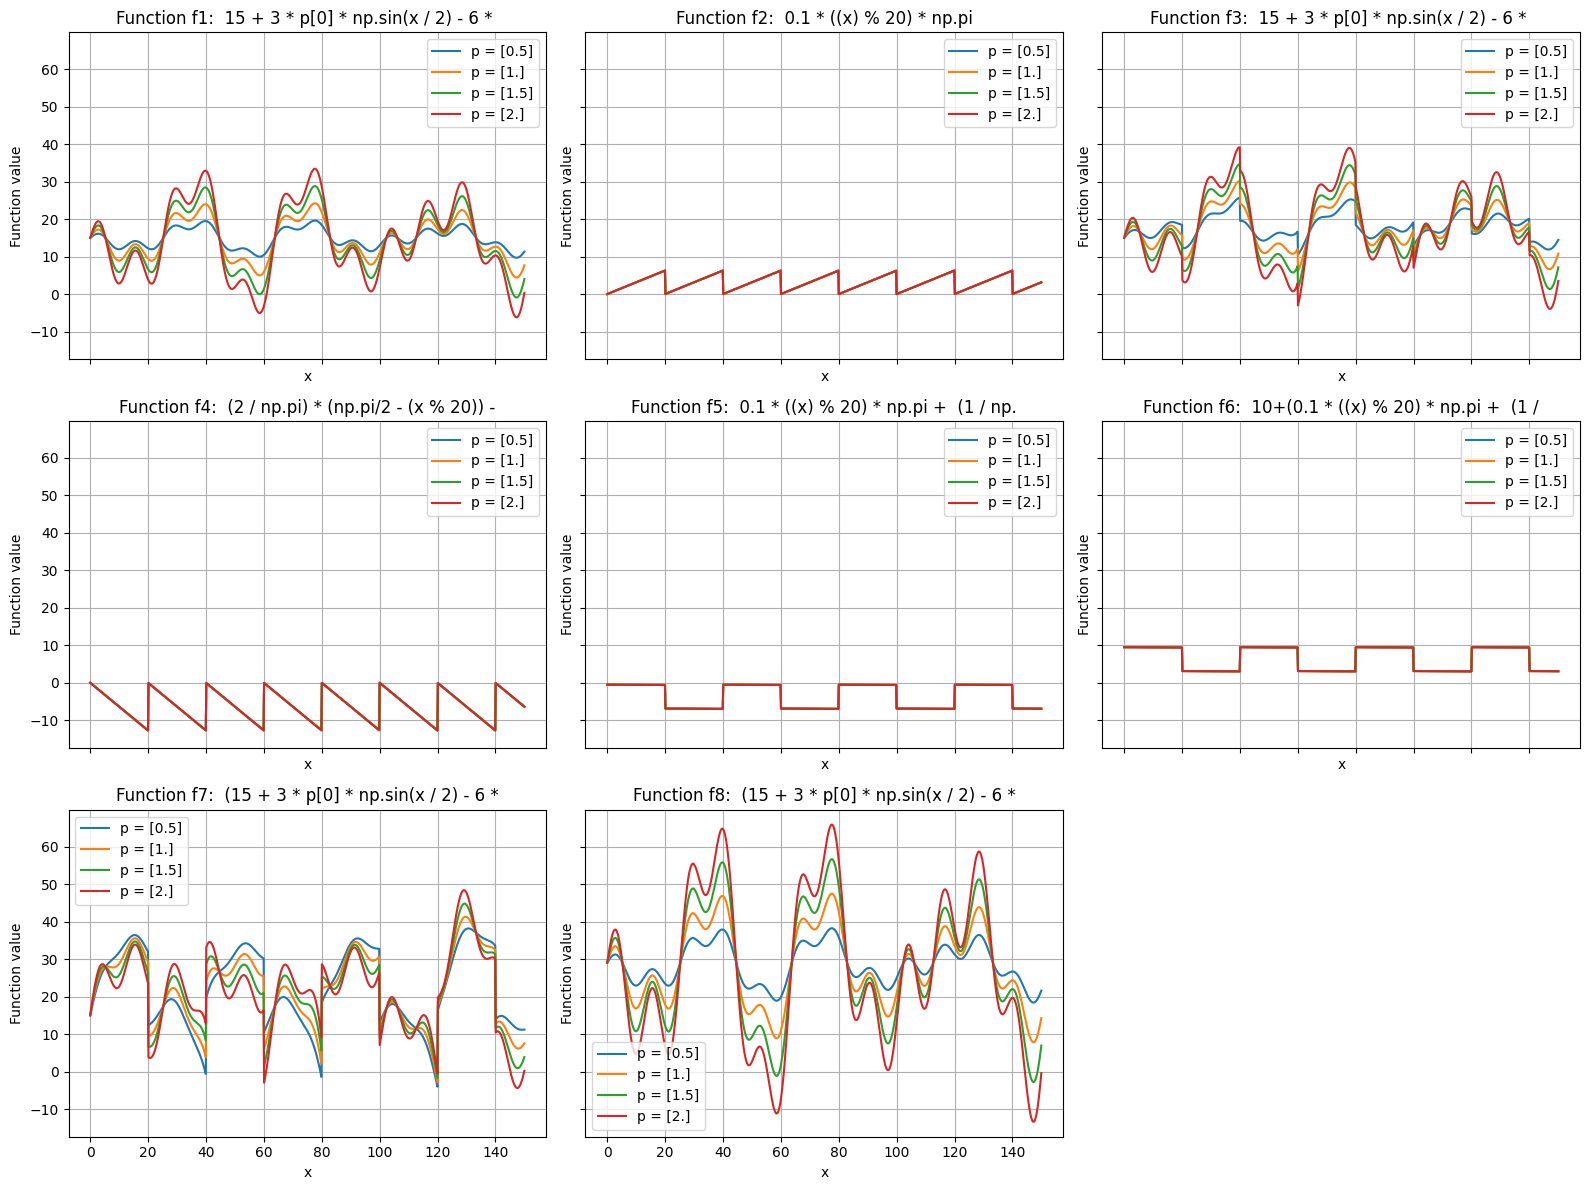

In [178]:
f = [
    lambda x, p: 15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5),
    lambda x, p: 0.1 * ((x) % 20) * np.pi,
    lambda x, p: 15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5) + 0.1 * ((x) % 20) * np.pi,
    lambda x, p: (2 / np.pi) * (np.pi/2 - (x % 20)) - 1,
    lambda x, p: 0.1 * ((x) % 20) * np.pi +  (1 / np.pi) * (np.pi/2 - (x % 40)) - 1,
    lambda x, p: 10+(0.1 * ((x) % 20) * np.pi +  (1 / np.pi) * (np.pi/2 - (x % 40)) - 1),
    lambda x, p: (15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5) + (0.1 * ((x) % 20) * np.pi) * (10+(1 / np.pi) * (np.pi/2 - (x % 40)) - 1)),
    lambda x, p: (15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5)) * 2 + (0.001 * ((x) % 30) * np.pi +  (0.01 / np.pi) * (np.pi/2 - (x % (2 * 30))) - 1),
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.5, 2.5, 0.5),
    ])

plot(f, p)

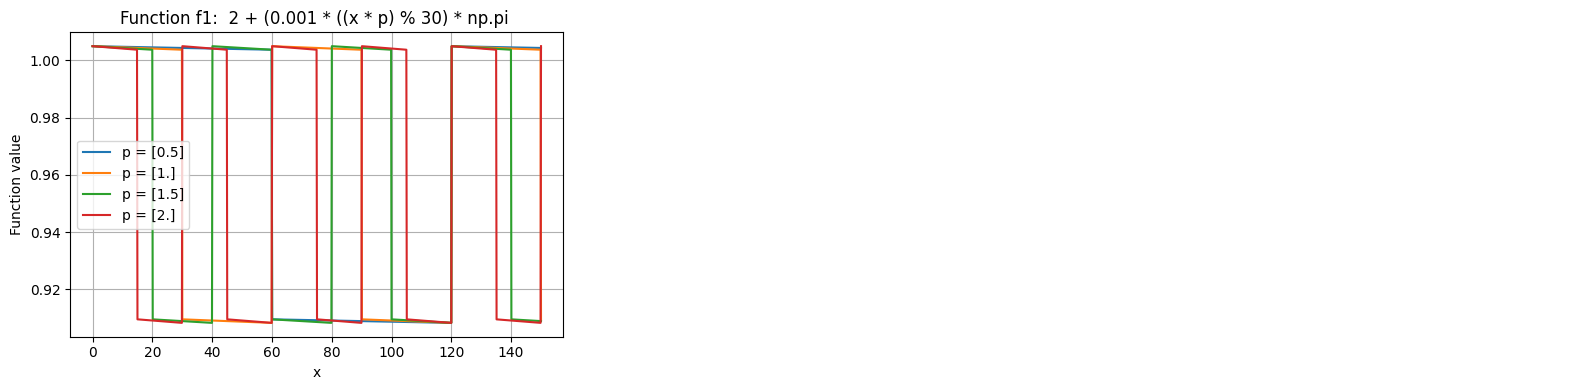

In [180]:
f = [
    lambda x, p: 2 + (0.001 * ((x * p) % 30) * np.pi +  (0.01 / np.pi) * (np.pi/2 - ((x * p) % (2 * 30))) - 1),
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.5, 2.5, 0.5),
    ])

plot(f, p)

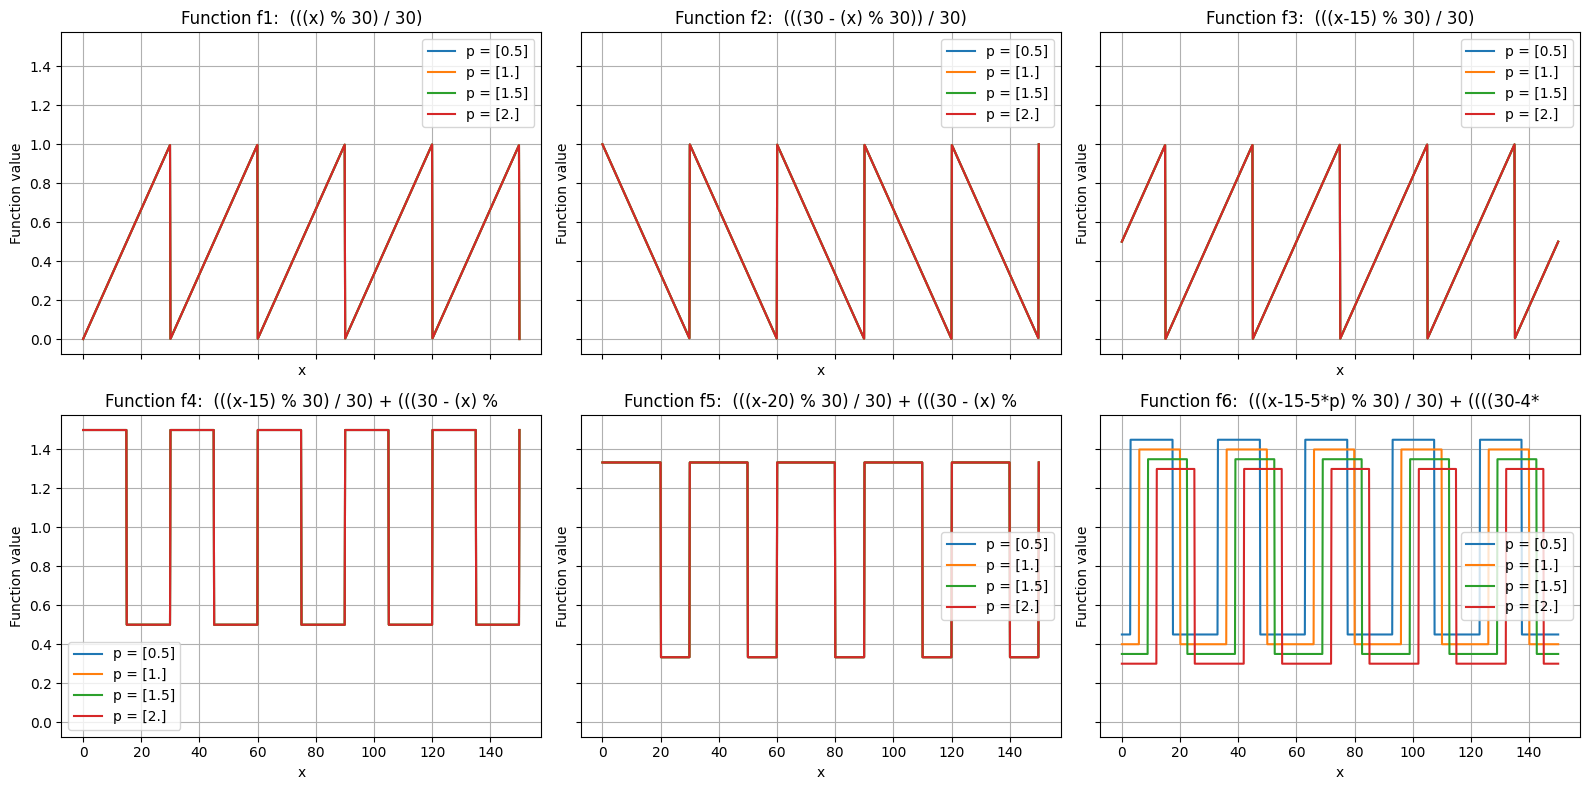

In [206]:
# List of functions defined using lambda expressions
f = [
    lambda x, p: (((x) % 30) / 30),
    lambda x, p: (((30 - (x) % 30)) / 30),
    lambda x, p: (((x-15) % 30) / 30),
    lambda x, p: (((x-15) % 30) / 30) + (((30 - (x) % 30)) / 30),
    lambda x, p: (((x-20) % 30) / 30) + (((30 - (x) % 30)) / 30),
    lambda x, p: (((x-15-5*p) % 30) / 30) + ((((30-4*p) - (x-6*p) % 30)) / 30),
]

# Define the p values to iterate over
p = np.column_stack([
    create_array(0.5, 0.5, 4)
    ])

plot(f, p)

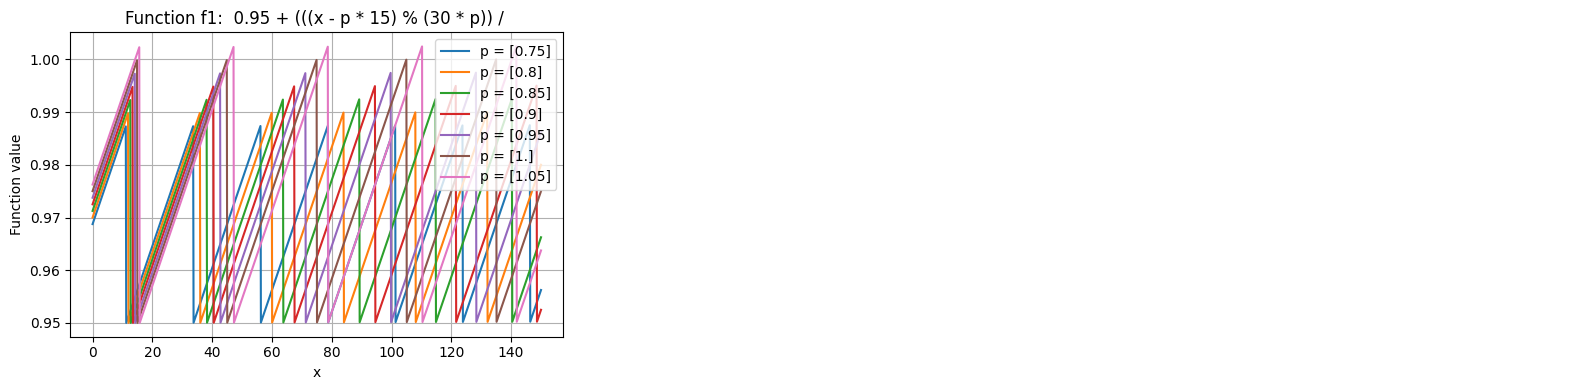

In [230]:
# List of functions defined using lambda expressions
f = [
    lambda x, p: 0.95 + (((x - p * 15) % (30 * p)) / 600),
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.75, 1.05, 0.05)
    ])

plot(f, p)

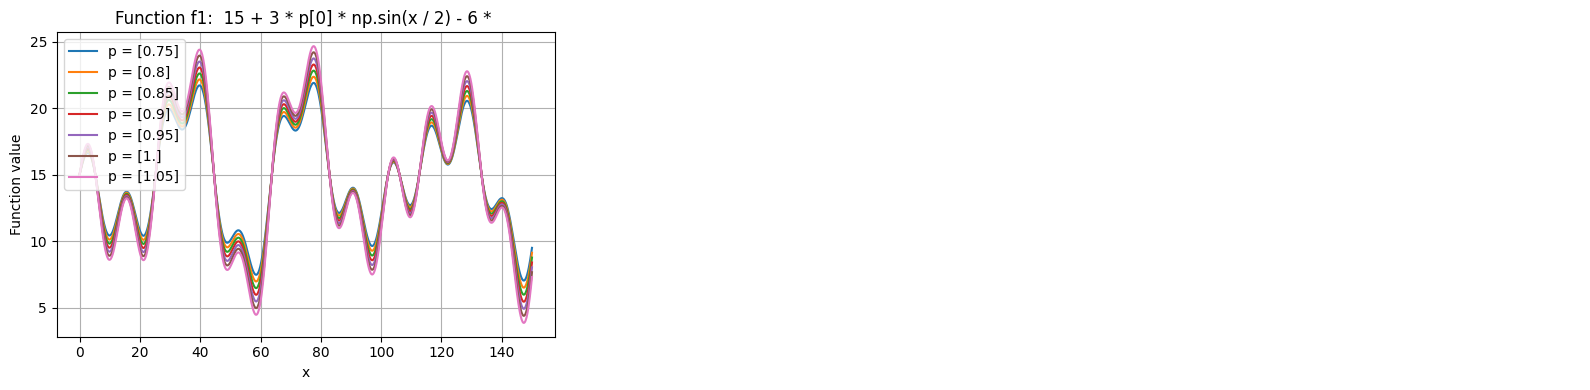

In [228]:
f = [
    lambda x, p: 15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5),
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.75, 1.05, 0.05),
    ])

plot(f, p)

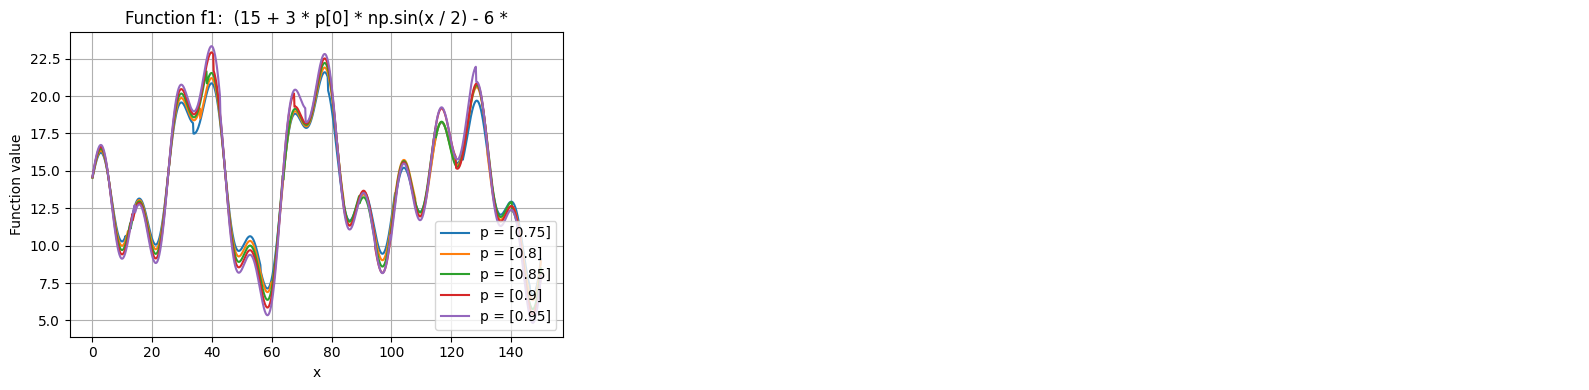

In [232]:
f = [
    lambda x, p: (15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5)) * (0.95 + (((x - p * 15) % (30 * p)) / 600)),
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.75, 1, 0.05),
    ])

plot(f, p)

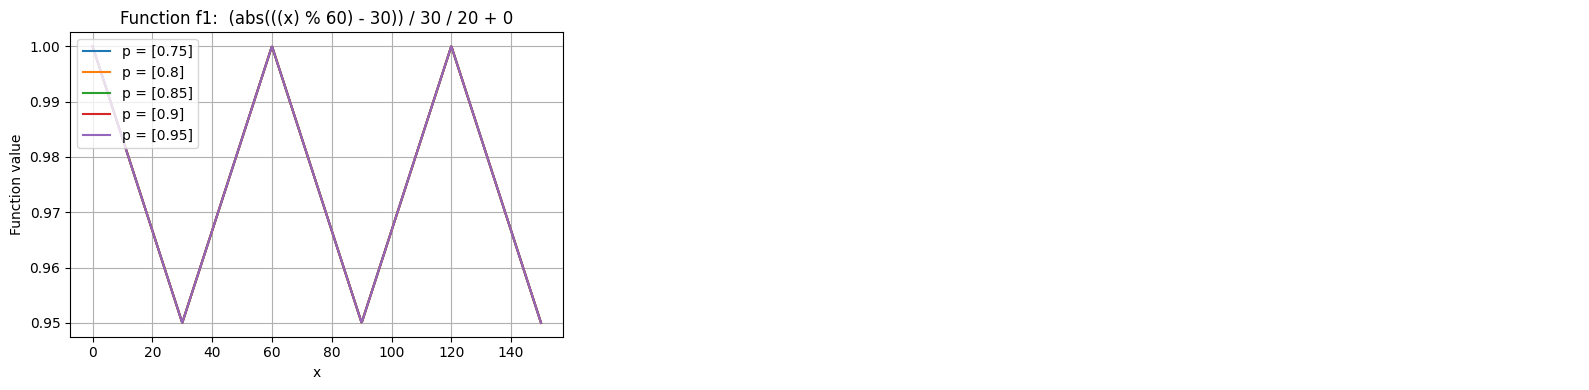

In [249]:
f = [
    lambda x, p: (abs(((x) % 60) - 30)) / 30 / 20 + 0.95
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.75, 1, 0.05),
    ])

plot(f, p)

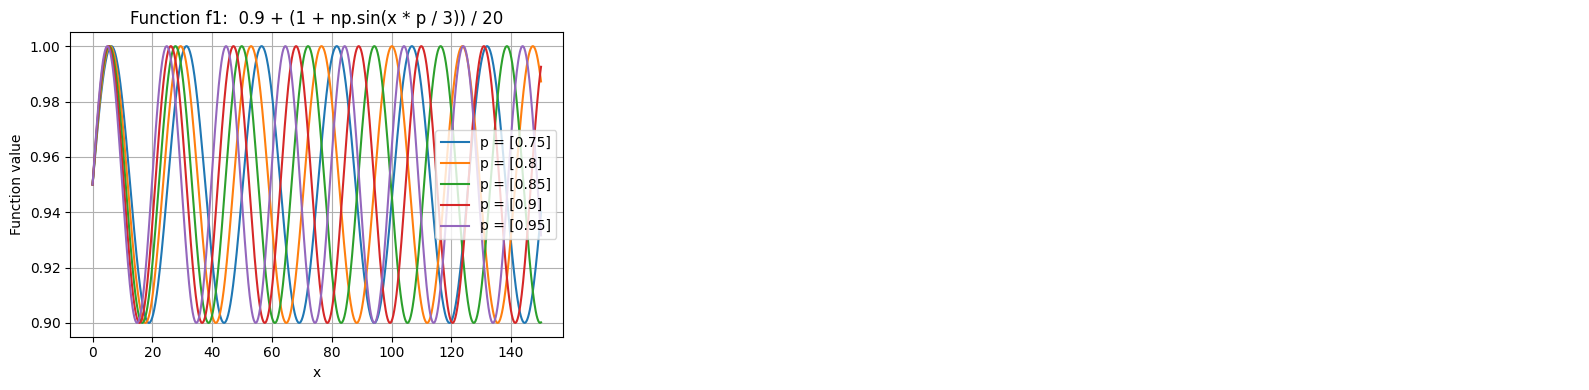

In [278]:
f = [
    lambda x, p: 0.9 + (1 + np.sin(x * p / 3)) / 20,
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.75, 1, 0.05),
    ])

plot(f, p)

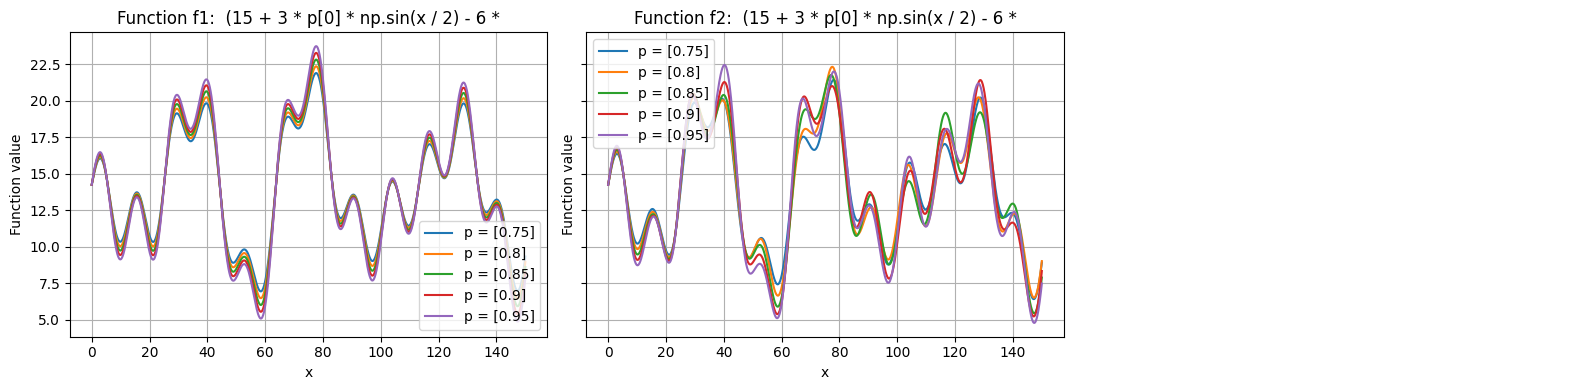

In [281]:
f = [
    lambda x, p: (15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5)) * (0.9 + (1 + np.sin(x / 10)) / 20),
    lambda x, p: (15 + 3 * p[0] * np.sin(x / 2) - 6 * p[0] * np.sin(x / 7) + 3 * p[0] * np.sin(x / 5)) * (0.9 + (1 + np.sin(x * p[0] / 3)) / 20),
]

# Define the p values to iterate over
p = np.column_stack([
    np.arange(0.75, 1, 0.05),
    ])

plot(f, p)

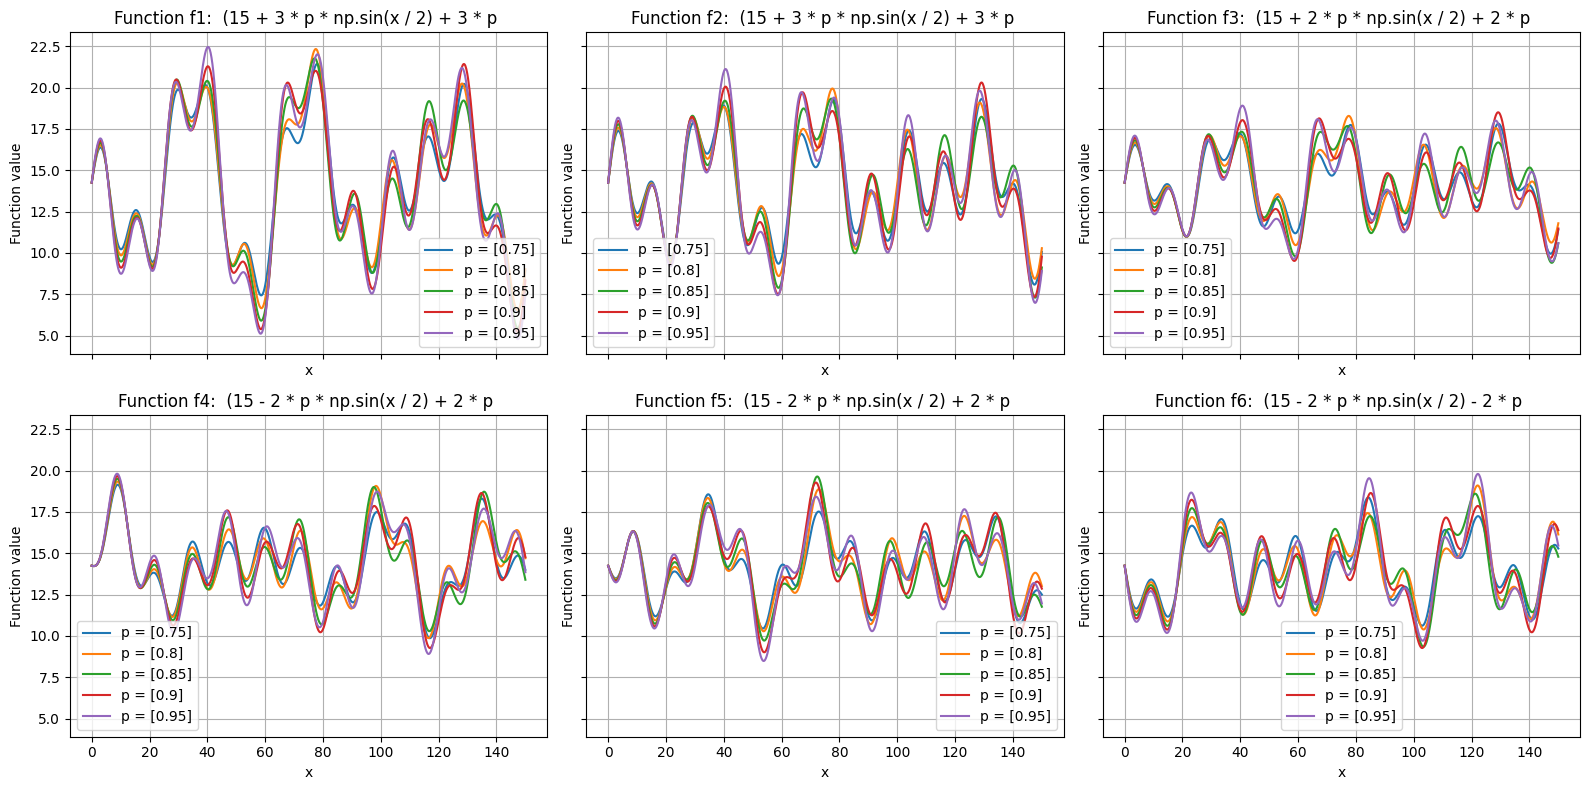

In [311]:
f = [
    lambda x, p: (15 + 3 * p * np.sin(x / 2) + 3 * p * np.sin(x / 5) - 6 * p * np.sin(x / 7)) * (0.9 + (1 + np.sin(x * p / 3)) / 20),
    lambda x, p: (15 + 3 * p * np.sin(x / 2) + 3 * p * np.sin(x / 5) - 3 * p * np.sin(x / 7)) * (0.9 + (1 + np.sin(x * p / 3)) / 20),
    lambda x, p: (15 + 2 * p * np.sin(x / 2) + 2 * p * np.sin(x / 5) - 2 * p * np.sin(x / 7)) * (0.9 + (1 + np.sin(x * p / 3)) / 20),
    lambda x, p: (15 - 2 * p * np.sin(x / 2) + 2 * p * np.sin(x / 5) + 2 * p * np.sin(x / 7)) * (0.9 + (1 + np.sin(x * p / 3)) / 20),
    lambda x, p: (15 - 2 * p * np.sin(x / 2) + 2 * p * np.sin(x / 5) - 2 * p * np.sin(x / 7)) * (0.9 + (1 + np.sin(x * p / 3)) / 20),
    lambda x, p: (15 - 2 * p * np.sin(x / 2) - 2 * p * np.sin(x / 5) - 2 * p * np.sin(x / 7)) * (0.9 + (1 + np.sin(x * p / 3)) / 20),
]

# Define the p values to iterate over
p = np.column_stack([
    [0.75, 0.8, 0.85, 0.9, 0.95],
    ])

plot(f, p)

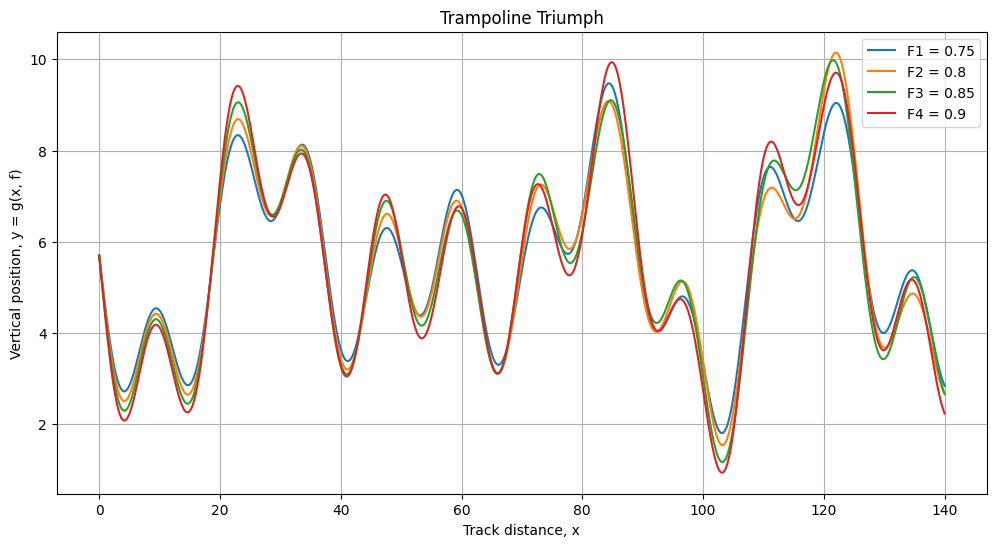

In [3]:
def plot_final(f, p):
    # Generate x values for the plot
    x = np.linspace(0, 140, 1000)

    plt.figure(figsize=(12, 6))

    for i, value in enumerate(p):
        y = f(x, value)
        plt.plot(x, y, label=f'F{i+1} = {value}')

    # Add labels and title
    plt.xlabel('Track distance, x')
    plt.ylabel('Vertical position, y = g(x, f)')
    plt.title('Trampoline Triumph')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    
f = lambda x, p: (6 - 2 * p * np.sin(x / 2) - 2 * p * np.sin(x / 5) - 2 * p * np.sin(x / 7)) * (0.9 + (1 + np.sin(x * p / 3)) / 20);

# Define the p values to iterate over
p = [0.75, 0.8, 0.85, 0.9]

plot_final(f, p)

In [71]:
def plot(f, p):
    # Generate x values for the plot
    x = np.linspace(0, 50, 1000)

    # Determine the number of rows needed for the grid
    num_functions = len(f)
    num_cols = 3
    num_rows = (num_functions + num_cols - 1) // num_cols  # Ceiling division to get the number of rows

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 2), sharex=True, sharey=True)

    # Flatten the axs array for easy indexing
    axs = axs.flatten()

    # Plot each function in its own subplot
    for i, func in enumerate(f):
        ax = axs[i]
        for value in p:
            y = func(x, value)
            ax.plot(x, y, label=f'p = {value}')
        
        # Generate LaTeX label for the function
        label = generate_label(func)

        # Add labels and title for each subplot
        # ax.set_title(f'Function f{i+1}: {label}'[:50])
        ax.set_title(f'Function f{i+1}')
        ax.set_xlabel('x')
        ax.set_ylabel('Function value')
        # ax.legend()
        ax.set_aspect('equal')
        ax.grid(True)

    # Turn off axes for any unused subplots
    for j in range(num_functions, len(axs)):
        axs[j].axis('off')

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

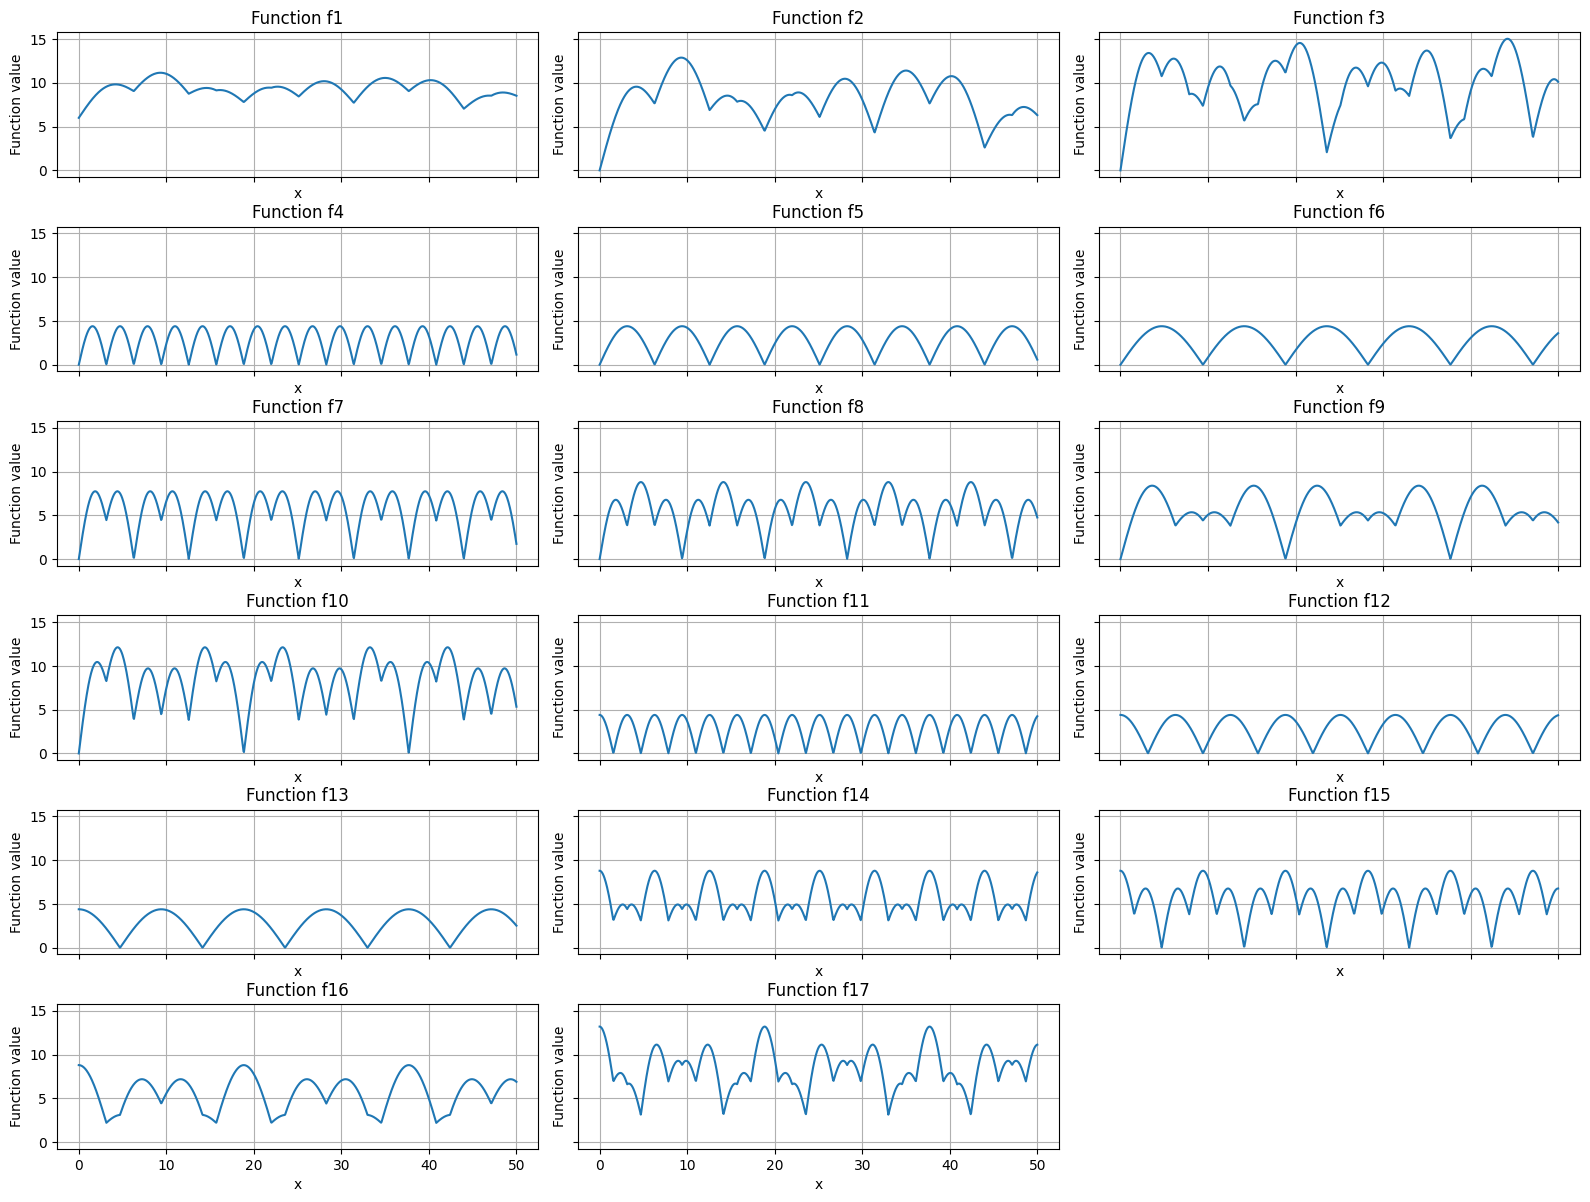

In [72]:
f = [
    # lambda x, p: (6 - 2 * p * np.sin(x / 2) - 2 * p * np.sin(x / 5) - 2 * p * np.sin(x / 7)) * (0.9 + (1 + np.sin(x * p / 3)) / 20),
    # lambda x, p: (6 - 2 * p * np.sin(x / 2) - 2 * p * np.sin(x / 5) - 2 * p * np.sin(x / 7)),
    lambda x, p: (6 + 2 * p * abs(np.sin(x / 2)) + 2 * p * abs(np.sin(x / 5)) + 2 * p * abs(np.sin(x / 7))),
    lambda x, p: (5 * p * abs(np.sin(x / 2)) + 5 * p * abs(np.sin(x / 5)) + 5 * p * abs(np.sin(x / 7))),
    lambda x, p: (5 * p * abs(np.sin(x / 1.5)) + 7 * p * abs(np.sin(x / 2.5)) + 6 * p * abs(np.sin(x / 4))),
    lambda x, p: (5 * p * abs(np.sin(x / 1))),
    lambda x, p: (5 * p * abs(np.sin(x / 2))),
    lambda x, p: (5 * p * abs(np.sin(x / 3))),
    lambda x, p: (5 * p * abs(np.sin(x / 1)) + 5 * p * abs(np.sin(x / 2))),
    lambda x, p: (5 * p * abs(np.sin(x / 1)) + 5 * p * abs(np.sin(x / 3))),
    lambda x, p: (5 * p * abs(np.sin(x / 2)) + 5 * p * abs(np.sin(x / 3))),
    lambda x, p: (5 * p * abs(np.sin(x / 1)) + 5 * p * abs(np.sin(x / 2))) + 5 * p * abs(np.sin(x / 3)),
    lambda x, p: (5 * p * abs(np.cos(x / 1))),
    lambda x, p: (5 * p * abs(np.cos(x / 2))),
    lambda x, p: (5 * p * abs(np.cos(x / 3))),
    lambda x, p: (5 * p * abs(np.cos(x / 1)) + 5 * p * abs(np.cos(x / 2))),
    lambda x, p: (5 * p * abs(np.cos(x / 1)) + 5 * p * abs(np.cos(x / 3))),
    lambda x, p: (5 * p * abs(np.cos(x / 2)) + 5 * p * abs(np.cos(x / 3))),
    lambda x, p: (5 * p * abs(np.cos(x / 1)) + 5 * p * abs(np.cos(x / 2))) + 5 * p * abs(np.cos(x / 3)),

]

# Define the p values to iterate over
# p = [0.75, 0.8, 0.85, 0.9, 0.95]
p = [0.88]

plot(f, p)

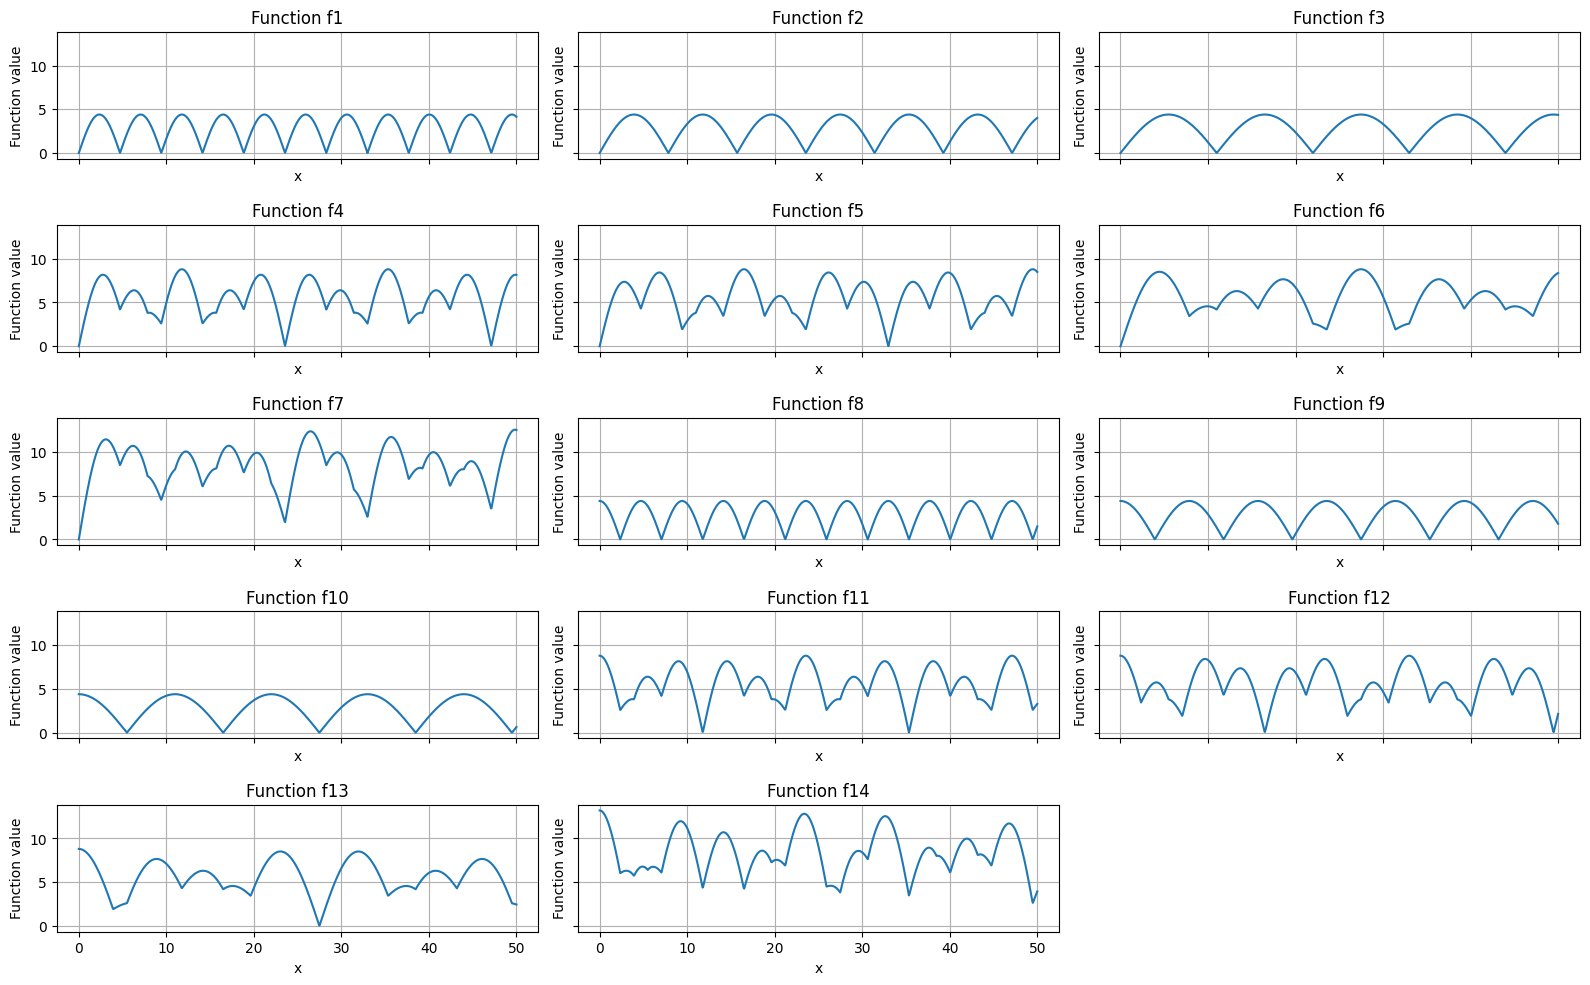

In [75]:
f = [
    lambda x, p: (5 * p * abs(np.sin(x / 1.5))),
    lambda x, p: (5 * p * abs(np.sin(x / 2.5))),
    lambda x, p: (5 * p * abs(np.sin(x / 3.5))),
    lambda x, p: (5 * p * abs(np.sin(x / 1.5)) + 5 * p * abs(np.sin(x / 2.5))),
    lambda x, p: (5 * p * abs(np.sin(x / 1.5)) + 5 * p * abs(np.sin(x / 3.5))),
    lambda x, p: (5 * p * abs(np.sin(x / 2.5)) + 5 * p * abs(np.sin(x / 3.5))),
    lambda x, p: (5 * p * abs(np.sin(x / 1.5)) + 5 * p * abs(np.sin(x / 2.5))) + 5 * p * abs(np.sin(x / 3.5)),
    lambda x, p: (5 * p * abs(np.cos(x / 1.5))),
    lambda x, p: (5 * p * abs(np.cos(x / 2.5))),
    lambda x, p: (5 * p * abs(np.cos(x / 3.5))),
    lambda x, p: (5 * p * abs(np.cos(x / 1.5)) + 5 * p * abs(np.cos(x / 2.5))),
    lambda x, p: (5 * p * abs(np.cos(x / 1.5)) + 5 * p * abs(np.cos(x / 3.5))),
    lambda x, p: (5 * p * abs(np.cos(x / 2.5)) + 5 * p * abs(np.cos(x / 3.5))),
    lambda x, p: (5 * p * abs(np.cos(x / 1.5)) + 5 * p * abs(np.cos(x / 2.5))) + 5 * p * abs(np.cos(x / 3.5)),

]

# Define the p values to iterate over
# p = [0.75, 0.8, 0.85, 0.9, 0.95]
p = [0.88]

plot(f, p)

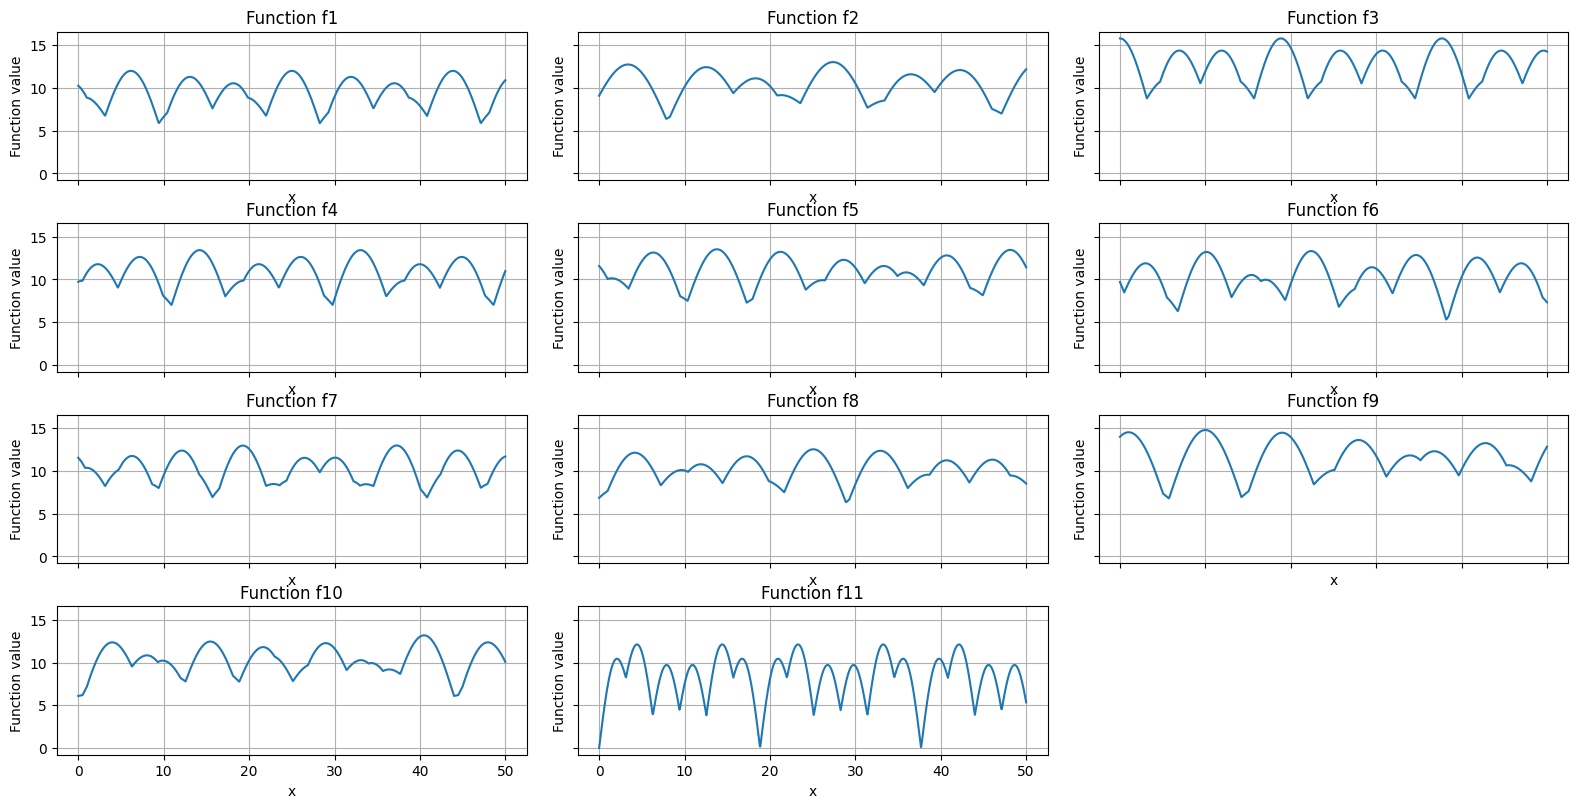

In [83]:
f = [
    lambda x, p: (5 * p * abs(np.cos(x / 2)) + 3 * p * abs(np.sin((x - 1) / 3))) + 5,
    lambda x, p: (4 * p * abs(np.sin(x / 2.5)) + 4 * p * abs(np.cos((x - 2) / 4))) + 6,
    lambda x, p: (6 * p * abs(np.cos(x / 2)) + 4 * p * abs(np.cos(x / 3))) + 7,
    lambda x, p: (5 * p * abs(np.cos((x - 1.5) / 2)) + 3.5 * p * abs(np.sin((x - 0.5) / 3))) + 6,
    lambda x, p: (4.5 * p * abs(np.cos(x / 2.2)) + 3.5 * p * abs(np.sin((x - 1) / 2.7))) + 6.5,
    lambda x, p: (5.5 * p * abs(np.sin((x - 0.5) / 2)) + 4 * p * abs(np.cos(x / 3.5))) + 5,
    lambda x, p: (4 * p * abs(np.cos(x / 2)) + 3 * p * abs(np.sin((x - 0.8) / 2.5)) + 2.5 * p * abs(np.cos(x / 3))) + 5,
    lambda x, p: (4.5 * p * abs(np.sin(x / 2.3)) + 3 * p * abs(np.sin((x - 1) / 3))) + 6,
    lambda x, p: (6 * p * abs(np.cos((x - 1.5) / 2.7)) + 4 * p * abs(np.cos(x / 3.2))) + 6,
    lambda x, p: (4 * p * abs(np.sin(x / 2)) + 3 * p * abs(np.sin((x - 0.5) / 2.8)) + 2.5 * p * abs(np.sin((x - 1) / 3.5))) + 5,
    lambda x, p: (5 * p * abs(np.sin(x / 1)) + 5 * p * abs(np.sin(x / 2))) + 5 * p * abs(np.sin(x / 3)),

]

# Define the p values to iterate over
# p = [0.75, 0.8, 0.85, 0.9, 0.95]
p = [0.88]

plot(f, p)

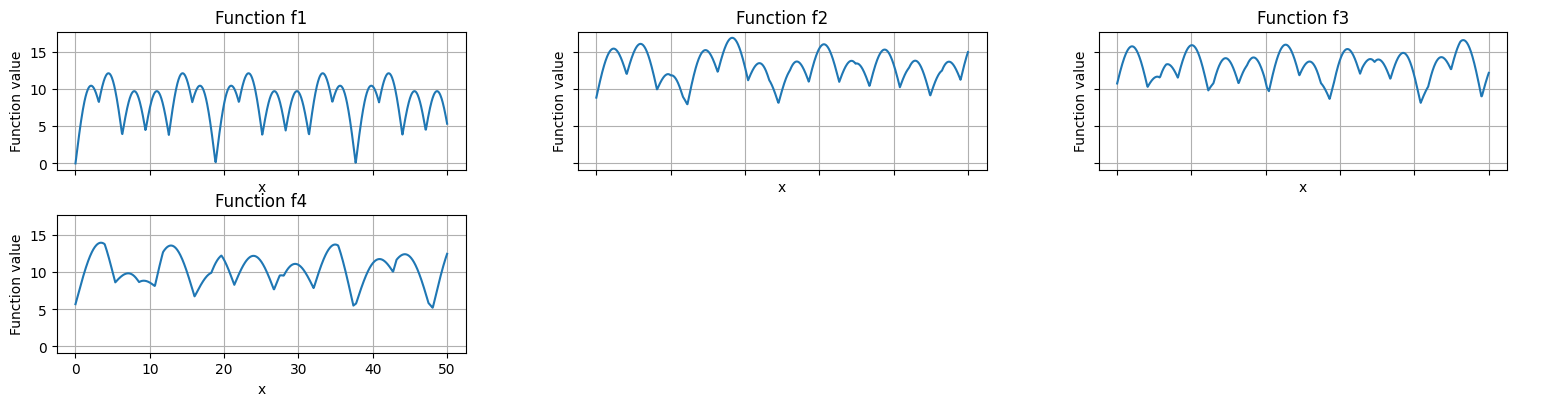

In [82]:
f = [
    lambda x, p: (5 * p * abs(np.sin(x / 1)) + 5 * p * abs(np.sin(x / 2))) + 5 * p * abs(np.sin(x / 3)),
    lambda x, p: (
        5 * p * abs(np.sin(x / 1.3)) +
        4 * p * abs(np.sin(x / 3.7)) +
        3.5 * p * abs(np.cos((x - 2) / 5.1)) +
        6
    ),
    lambda x, p: (
        4.5 * p * abs(np.sin(x / 1.3)) + 3.5 * p * abs(np.sin((x + 1.5) / 2.3)) + 2.5 * p * abs(np.cos(x / 3.7))
    ) + 8 - 1.5 * p * abs(np.cos(x / 4.2)),
    lambda x, p: (
        5 * p * abs(np.sin(x / 1.7)) + 4 * p * abs(np.sin((x + 1.2) / 3.1)) - 3 * p * abs(np.cos(x / 2.5))
    ) + 7,





]

# Define the p values to iterate over
# p = [0.75, 0.8, 0.85, 0.9, 0.95]
p = [0.88]

plot(f, p)

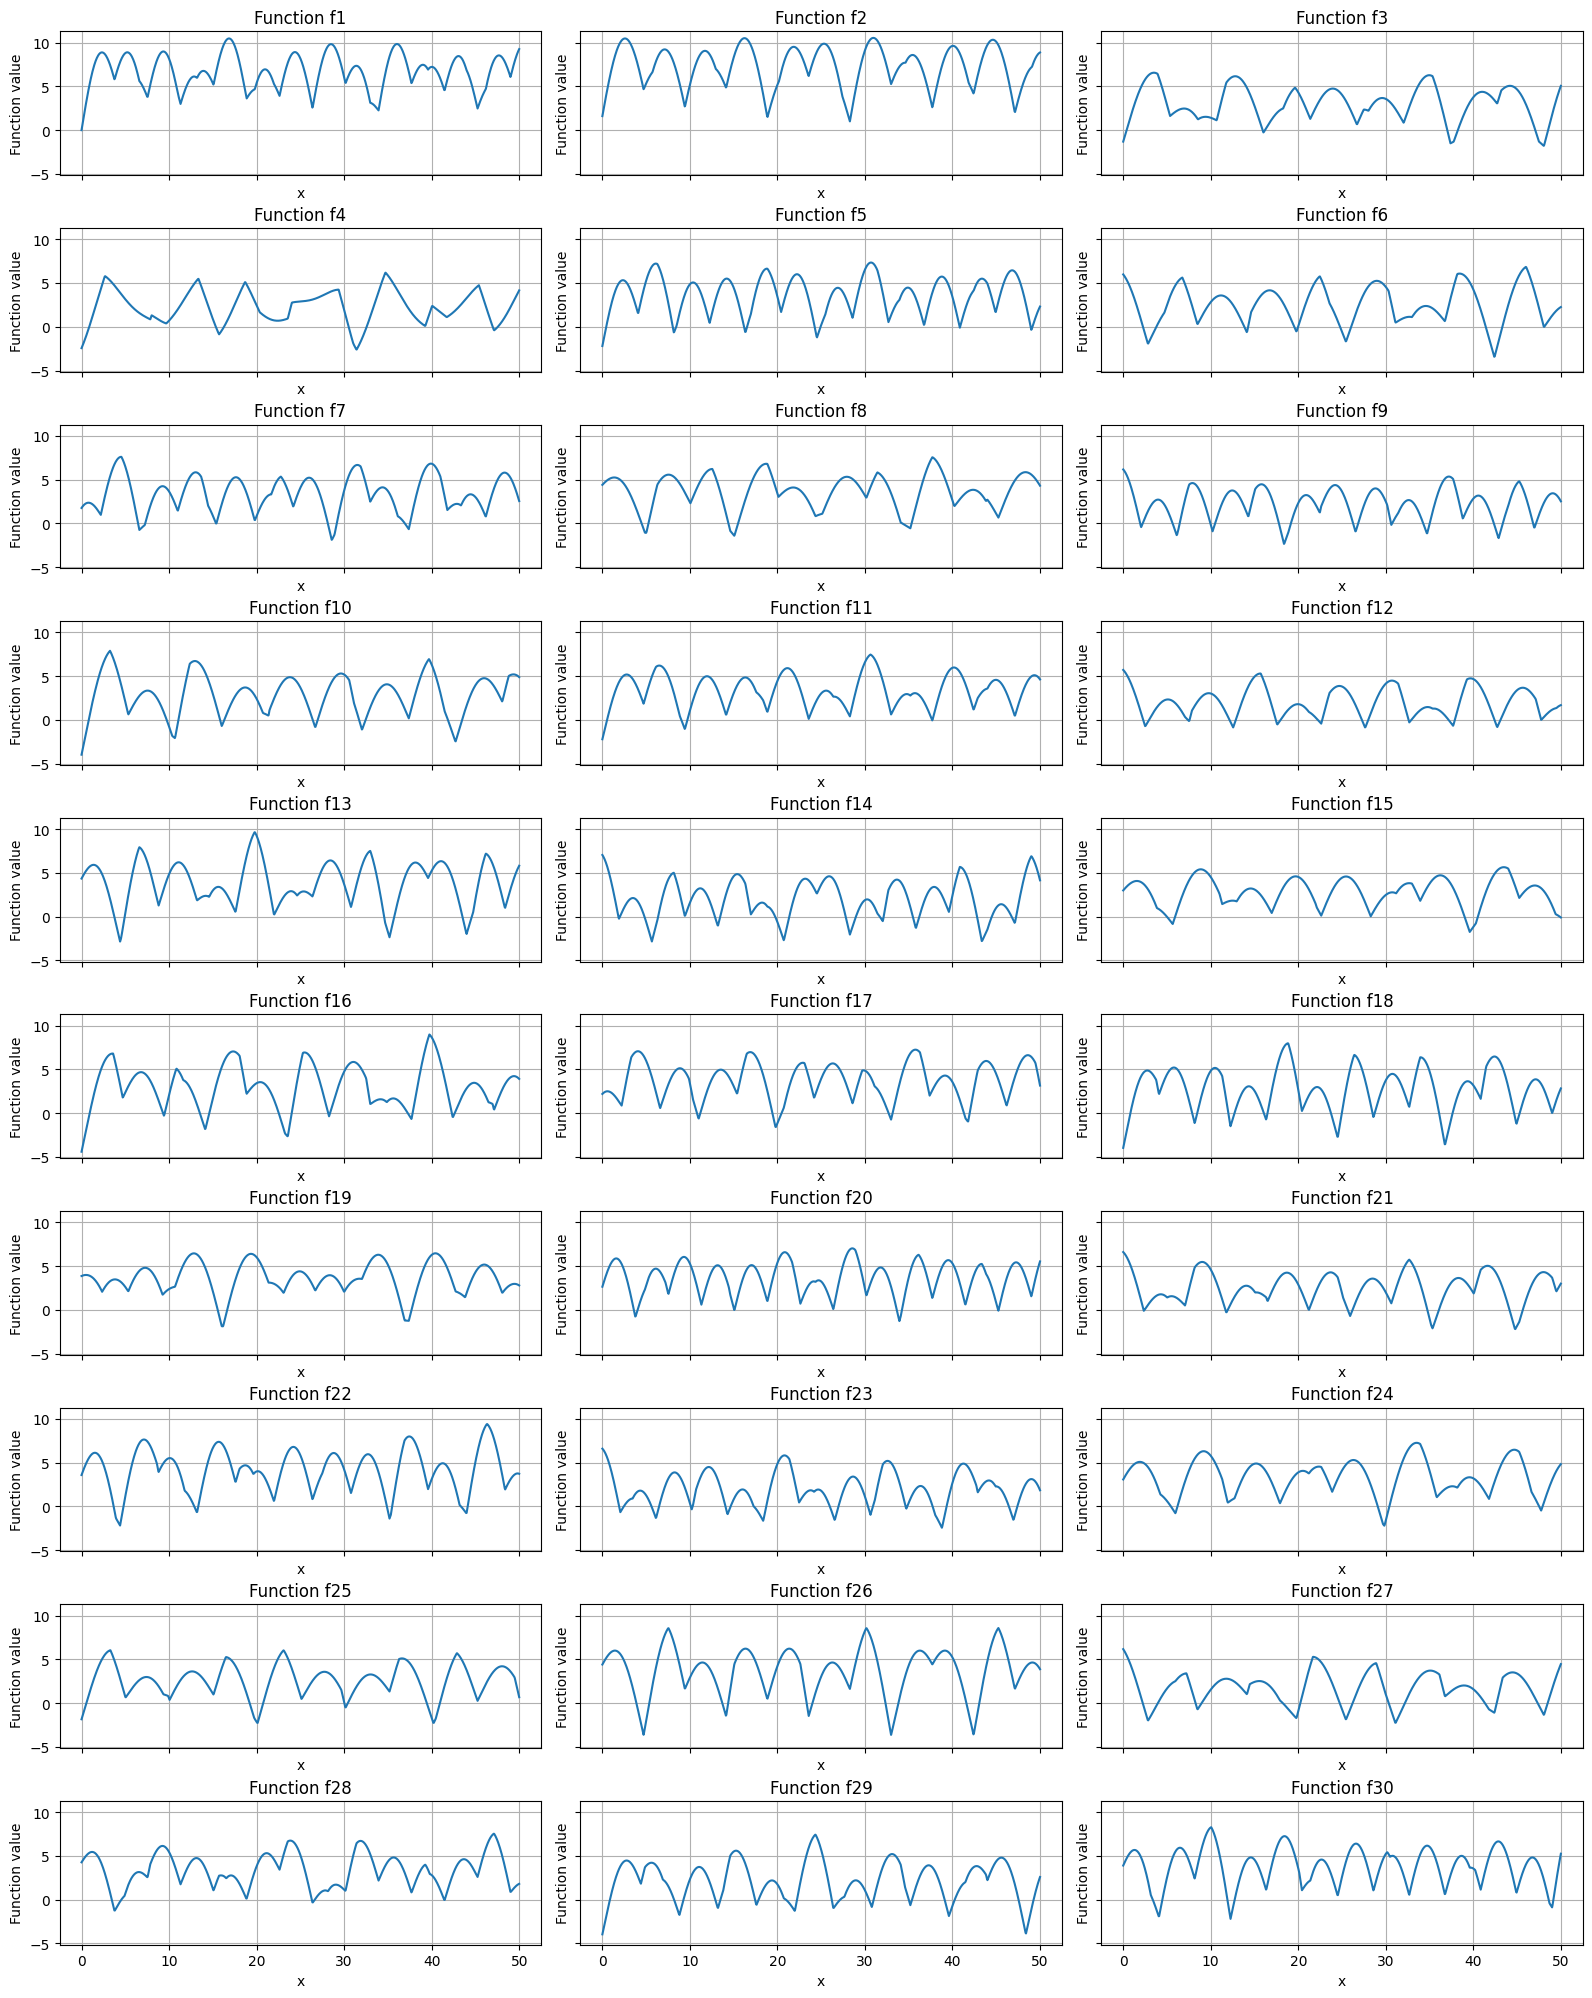

In [84]:
f = [
    lambda x, p: (5 * p * abs(np.sin(x / 1.2)) + 4 * p * abs(np.sin(x / 2.1))) + 3 * p * abs(np.sin(x / 3.5)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.5)) + 3 * p * abs(np.sin((x + 1.5) / 2.3))) + 4 * p * abs(np.sin(x / 3)),
    lambda x, p: (4.5 * p * abs(np.sin(x / 1.7)) + 4 * p * abs(np.sin((x + 1.2) / 3.1))) - 3 * p * abs(np.cos(x / 2.5)),
    lambda x, p: (5 * p * abs(np.sin(x / 2.5)) - 3.5 * p * abs(np.cos(x / 1.7))) + 2.5 * p * abs(np.sin((x + 1) / 3.4)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.3)) + 3 * p * abs(np.sin(x / 2.7))) - 2.5 * p * abs(np.cos(x / 4)),
    lambda x, p: (5.5 * p * abs(np.cos(x / 1.8)) - 4 * p * abs(np.sin((x + 1.1) / 2.5))) + 3 * p * abs(np.cos(x / 3)),
    lambda x, p: (5 * p * abs(np.cos(x / 1.4)) + 4 * p * abs(np.sin(x / 2.3))) - 3 * p * abs(np.cos(x / 2.9)),
    lambda x, p: (4 * p * abs(np.sin(x / 1.6)) + 5 * p * abs(np.cos(x / 3.1))) - 2.5 * p * abs(np.sin(x / 2)),
    lambda x, p: (5 * p * abs(np.cos(x / 1.3)) - 3 * p * abs(np.sin(x / 2.4))) + 2 * p * abs(np.cos(x / 4)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.7)) - 5 * p * abs(np.cos((x + 1.3) / 2.9))) + 4 * p * abs(np.sin(x / 3.3)),
    lambda x, p: (5.5 * p * abs(np.sin(x / 1.5)) + 3 * p * abs(np.sin(x / 2.8))) - 2.5 * p * abs(np.cos(x / 3.9)),
    lambda x, p: (4.5 * p * abs(np.cos(x / 1.6)) - 3 * p * abs(np.sin(x / 2.5))) + 2 * p * abs(np.cos(x / 4.5)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.4)) + 5 * p * abs(np.cos((x + 0.5) / 3.2))) - 4 * p * abs(np.sin(x / 2.1)),
    lambda x, p: (5 * p * abs(np.cos(x / 1.2)) - 4.5 * p * abs(np.sin(x / 2.6))) + 3 * p * abs(np.cos(x / 4)),
    lambda x, p: (4.5 * p * abs(np.sin(x / 1.8)) + 3.5 * p * abs(np.cos((x + 0.7) / 2.9))) - 3 * p * abs(np.sin(x / 3.5)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.5)) - 5 * p * abs(np.cos(x / 2.3))) + 4.5 * p * abs(np.sin(x / 3.7)),
    lambda x, p: (5.5 * p * abs(np.cos(x / 1.4)) + 4 * p * abs(np.sin(x / 3.3))) - 3 * p * abs(np.cos(x / 2.1)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.3)) - 4.5 * p * abs(np.cos(x / 2.4))) + 3.5 * p * abs(np.sin(x / 3.9)),
    lambda x, p: (4 * p * abs(np.sin(x / 1.7)) + 5 * p * abs(np.cos((x + 1.1) / 2.2))) - 2.5 * p * abs(np.sin(x / 3.4)),
    lambda x, p: (5.5 * p * abs(np.sin(x / 1.2)) + 3 * p * abs(np.cos(x / 3.1))) - 2 * p * abs(np.sin(x / 2.3)),
    lambda x, p: (4.5 * p * abs(np.cos(x / 1.5)) - 3 * p * abs(np.sin(x / 2.6))) + 3 * p * abs(np.cos(x / 3.2)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.4)) + 5 * p * abs(np.cos(x / 2.5))) - 3.5 * p * abs(np.sin((x + 0.8) / 3)),
    lambda x, p: (5 * p * abs(np.cos(x / 1.3)) - 4 * p * abs(np.sin(x / 3.4))) + 2.5 * p * abs(np.cos(x / 2.2)),
    lambda x, p: (5.5 * p * abs(np.sin(x / 1.9)) + 3.5 * p * abs(np.cos(x / 2.7))) - 3 * p * abs(np.sin(x / 3.6)),
    lambda x, p: (4.5 * p * abs(np.sin(x / 1.6)) - 3 * p * abs(np.cos(x / 2.1))) + 3 * p * abs(np.sin((x + 1) / 3.3)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.5)) + 5 * p * abs(np.cos(x / 3))) - 4.5 * p * abs(np.sin(x / 2.4)),
    lambda x, p: (5 * p * abs(np.cos(x / 1.8)) - 4 * p * abs(np.sin(x / 2.3))) + 2 * p * abs(np.cos(x / 3.8)),
    lambda x, p: (4 * p * abs(np.sin(x / 1.2)) + 5 * p * abs(np.cos((x + 0.9) / 3.7))) - 3 * p * abs(np.sin(x / 2.5)),
    lambda x, p: (5.5 * p * abs(np.sin(x / 1.4)) - 4.5 * p * abs(np.cos(x / 3.1))) + 3 * p * abs(np.sin(x / 2.2)),
    lambda x, p: (6 * p * abs(np.sin(x / 1.3)) + 5 * p * abs(np.cos((x + 1.4) / 2.9))) - 4 * p * abs(np.sin(x / 3.2))
]

# Define the p values to iterate over
# p = [0.75, 0.8, 0.85, 0.9, 0.95]
p = [0.88]

plot(f, p)

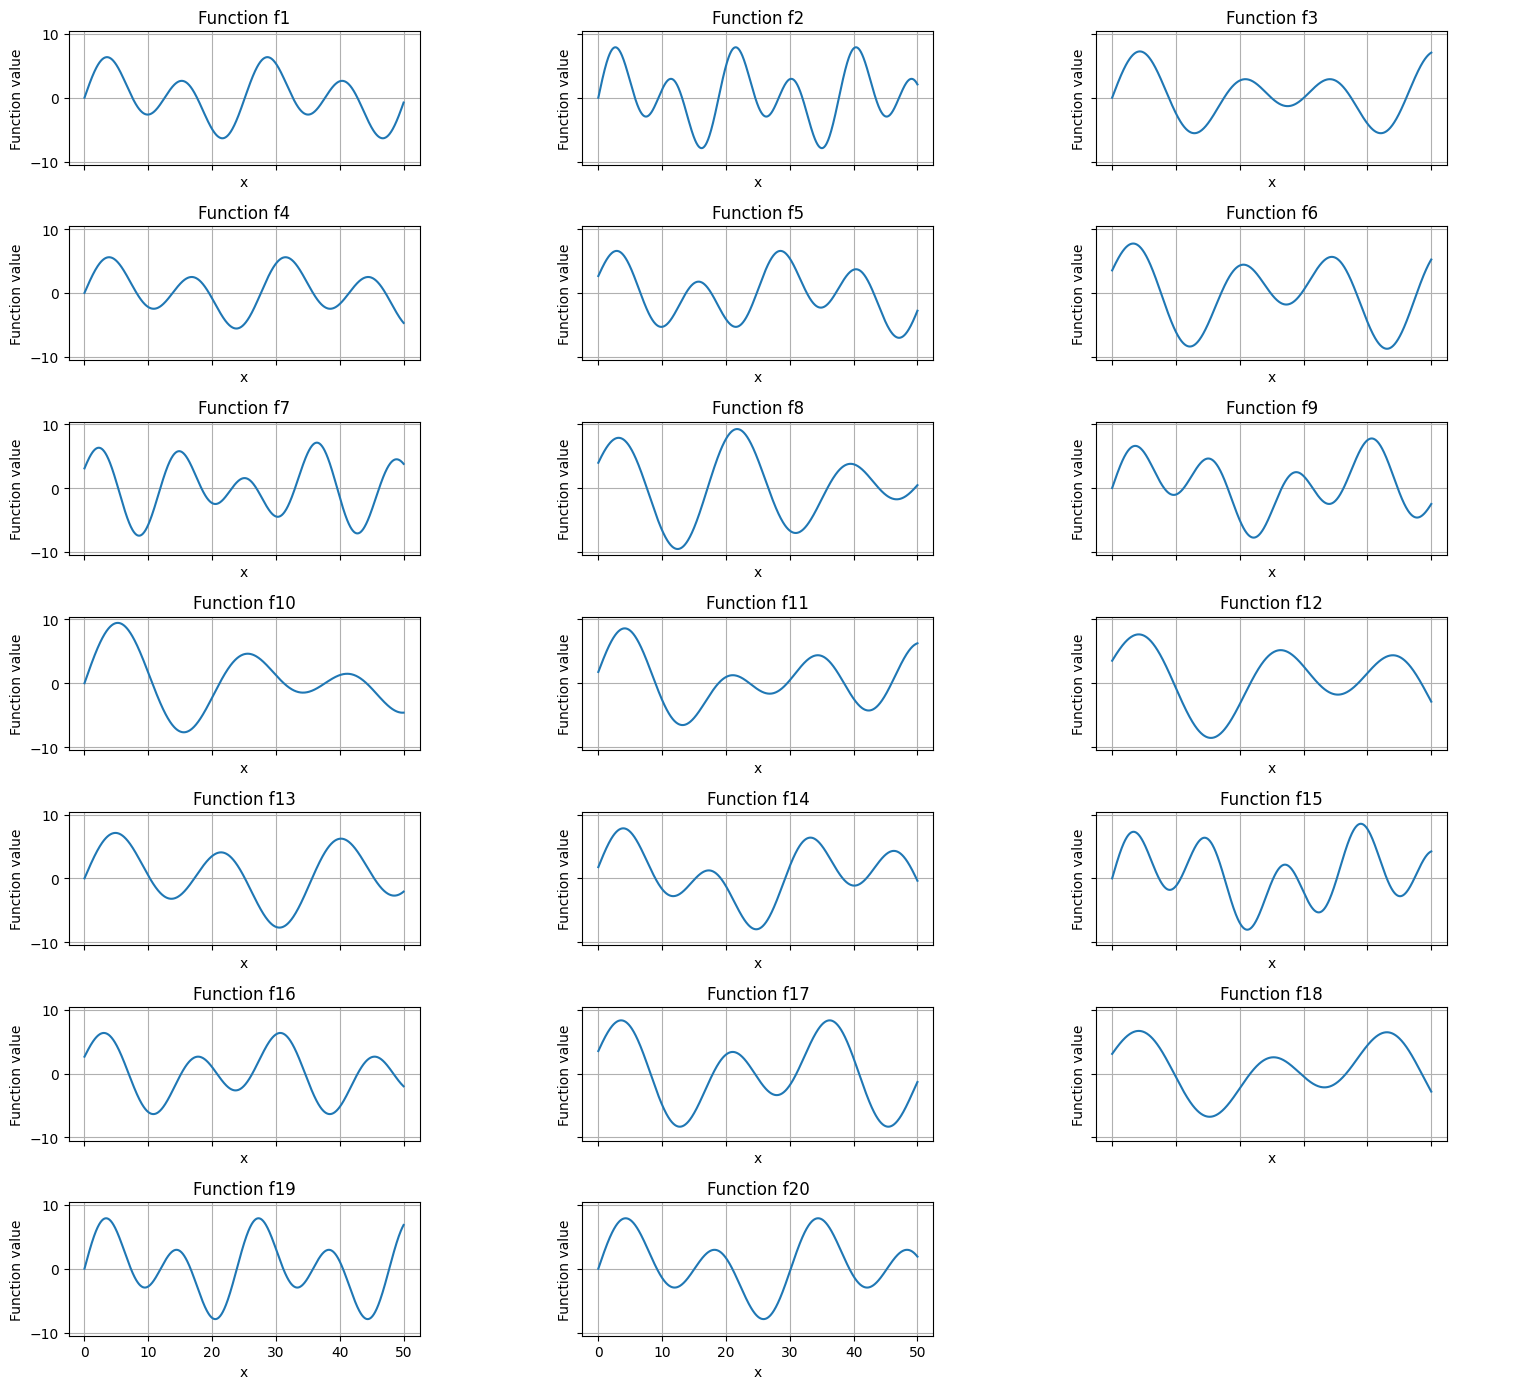

In [85]:
f = [
    # Smooth and symmetric sine-based curves with no sharp maxima
    lambda x, p: 5 * p * np.sin(x / 2) + 3 * p * np.sin(x / 4),
    lambda x, p: 6 * p * np.sin(x / 1.5) + 4 * p * np.sin(x / 3),
    lambda x, p: 5 * p * np.sin(x / 2.5) + 3.5 * p * np.sin(x / 3.5),
    lambda x, p: 4.5 * p * np.sin(x / 2.2) + 2.5 * p * np.sin(x / 4.4),
    
    # Adding a gentle cosine term for smooth rounded maxima
    lambda x, p: 5 * p * np.sin(x / 2) + 3 * p * np.cos(x / 5),
    lambda x, p: 6 * p * np.sin(x / 2.5) + 4 * p * np.cos(x / 4.5),
    lambda x, p: 5 * p * np.sin(x / 1.8) + 3.5 * p * np.cos(x / 2.8),
    lambda x, p: 6.5 * p * np.sin(x / 2.7) + 4.5 * p * np.cos(x / 3.7),

    # Combination of sine terms for smoother jumps
    lambda x, p: 5 * p * np.sin(x / 2) + 4 * p * np.sin(x / 5),
    lambda x, p: 6 * p * np.sin(x / 3) + 5 * p * np.sin(x / 4),
    lambda x, p: 5 * p * np.sin(x / 2.5) + 3.5 * p * np.sin(x / 3.5) + 2 * p * np.cos(x / 6),
    lambda x, p: 6 * p * np.sin(x / 3.2) + 4 * p * np.cos(x / 5.5),

    # Extended smooth waves to reduce periodic repetition
    lambda x, p: 6 * p * np.sin(x / 2.8) + 3 * p * np.sin(x / 6),
    lambda x, p: 5 * p * np.sin(x / 2.3) + 3 * p * np.sin(x / 4.6) + 2 * p * np.cos(x / 7),
    lambda x, p: 6 * p * np.sin(x / 1.9) + 4 * p * np.sin(x / 5.2),

    # Avoiding sharp peaks with smooth sine terms
    lambda x, p: 5 * p * np.sin(x / 2.2) + 3 * p * np.cos(x / 4.4),
    lambda x, p: 6.5 * p * np.sin(x / 2.6) + 4 * p * np.cos(x / 5.2),
    lambda x, p: 5 * p * np.sin(x / 3.1) + 3.5 * p * np.cos(x / 6.1),
    lambda x, p: 6 * p * np.sin(x / 1.9) + 4 * p * np.sin(x / 3.8),
    
    # Smooth, extended jumps with sine waves
    lambda x, p: 6 * p * np.sin(x / 2.4) + 4 * p * np.sin(x / 4.8)
]

# Define the p values to iterate over
# p = [0.75, 0.8, 0.85, 0.9, 0.95]
p = [0.88]

plot(f, p)

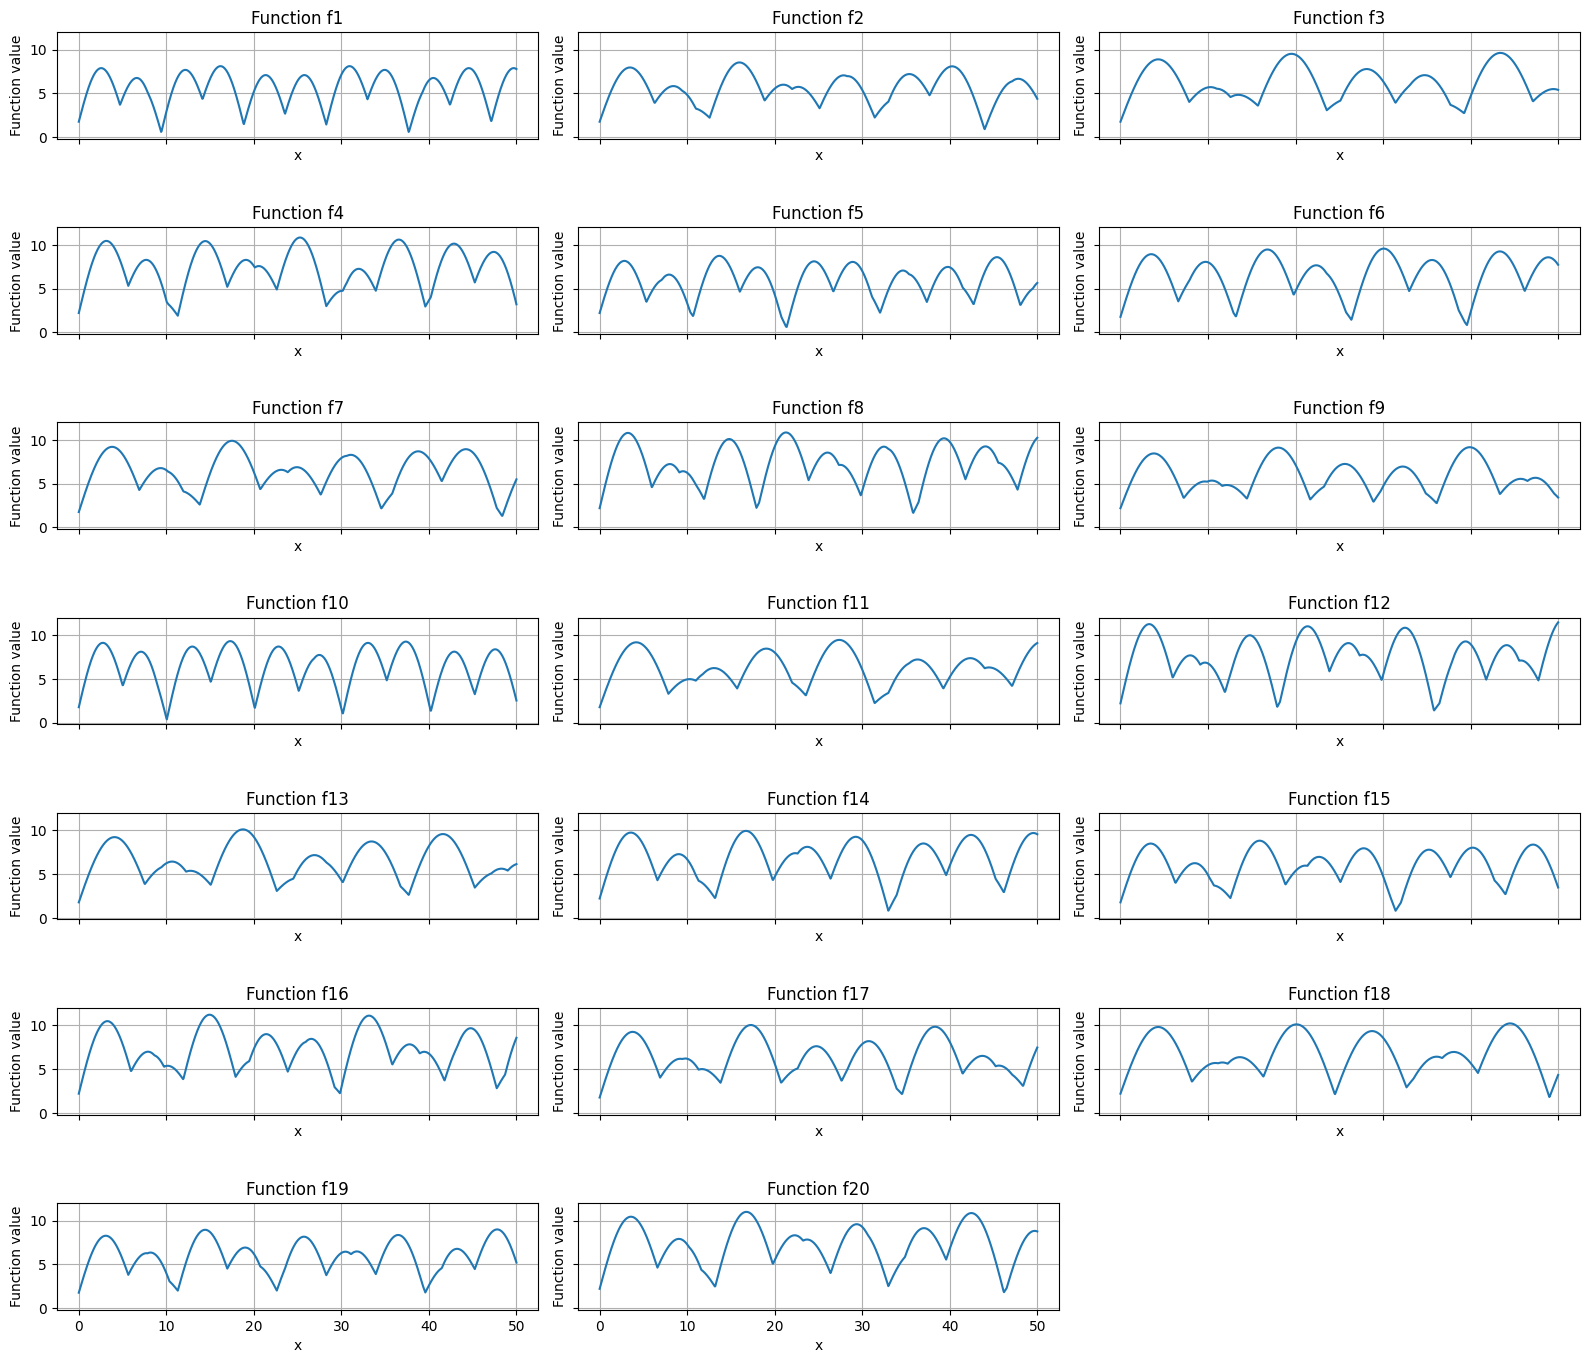

In [86]:
f = [
    # Using abs() for sharp trampoline-like landings and smooth jumps
    lambda x, p: 5 * p * abs(np.sin(x / 1.5)) + 3 * p * abs(np.sin(x / 3)) + 2 * p * abs(np.cos(x / 5)),
    lambda x, p: 4.5 * p * abs(np.sin(x / 2)) + 3.5 * p * abs(np.sin(x / 3.5)) + 2 * p * abs(np.cos(x / 6)),
    lambda x, p: 5 * p * abs(np.sin(x / 2.5)) + 4 * p * abs(np.sin(x / 4)) + 2 * p * abs(np.cos(x / 7)),
    lambda x, p: 6 * p * abs(np.sin(x / 1.8)) + 4.5 * p * abs(np.sin(x / 3.2)) + 2.5 * p * abs(np.cos(x / 6.5)),
    
    # Increasing periods for more varied jumps and smoother symmetry
    lambda x, p: 5 * p * abs(np.sin(x / 1.7)) + 3 * p * abs(np.sin(x / 3.3)) + 2.5 * p * abs(np.cos(x / 4.5)),
    lambda x, p: 6 * p * abs(np.sin(x / 2.1)) + 3.5 * p * abs(np.sin(x / 4.1)) + 2 * p * abs(np.cos(x / 5)),
    lambda x, p: 5.5 * p * abs(np.sin(x / 2.2)) + 4 * p * abs(np.sin(x / 3.8)) + 2 * p * abs(np.cos(x / 6.5)),
    lambda x, p: 6.5 * p * abs(np.sin(x / 1.9)) + 4 * p * abs(np.sin(x / 2.9)) + 2.5 * p * abs(np.cos(x / 7)),
    
    # Adding slight variations to the period for more realistic jumps
    lambda x, p: 5 * p * abs(np.sin(x / 2.3)) + 3 * p * abs(np.sin(x / 3.7)) + 2.5 * p * abs(np.cos(x / 6.3)),
    lambda x, p: 6 * p * abs(np.sin(x / 1.6)) + 3.5 * p * abs(np.sin(x / 3.2)) + 2 * p * abs(np.cos(x / 5.7)),
    lambda x, p: 5.5 * p * abs(np.sin(x / 2.5)) + 3.5 * p * abs(np.sin(x / 3.5)) + 2 * p * abs(np.cos(x / 7.5)),
    lambda x, p: 6.5 * p * abs(np.sin(x / 1.9)) + 4.5 * p * abs(np.sin(x / 2.9)) + 2.5 * p * abs(np.cos(x / 8)),

    # Extending periodicity while keeping sharp local minima
    lambda x, p: 5.5 * p * abs(np.sin(x / 2.4)) + 4 * p * abs(np.sin(x / 3.9)) + 2 * p * abs(np.cos(x / 6)),
    lambda x, p: 6 * p * abs(np.sin(x / 2.1)) + 3.5 * p * abs(np.sin(x / 3.6)) + 2.5 * p * abs(np.cos(x / 7)),
    lambda x, p: 5 * p * abs(np.sin(x / 2)) + 3.5 * p * abs(np.sin(x / 3.4)) + 2 * p * abs(np.cos(x / 6.5)),
    
    # Smoother curves but still with sharp minima for landing effect
    lambda x, p: 6 * p * abs(np.sin(x / 1.9)) + 4.5 * p * abs(np.sin(x / 3.1)) + 2.5 * p * abs(np.cos(x / 5.5)),
    lambda x, p: 5.5 * p * abs(np.sin(x / 2.2)) + 4 * p * abs(np.sin(x / 3.6)) + 2 * p * abs(np.cos(x / 6)),
    lambda x, p: 6 * p * abs(np.sin(x / 2.6)) + 3.5 * p * abs(np.sin(x / 3.9)) + 2.5 * p * abs(np.cos(x / 7.1)),
    lambda x, p: 5 * p * abs(np.sin(x / 1.8)) + 3.5 * p * abs(np.sin(x / 3.3)) + 2 * p * abs(np.cos(x / 5)),
    lambda x, p: 6.5 * p * abs(np.sin(x / 2.1)) + 4 * p * abs(np.sin(x / 3.7)) + 2.5 * p * abs(np.cos(x / 6.5)),
]


# Define the p values to iterate over
# p = [0.75, 0.8, 0.85, 0.9, 0.95]
p = [0.88]

plot(f, p)

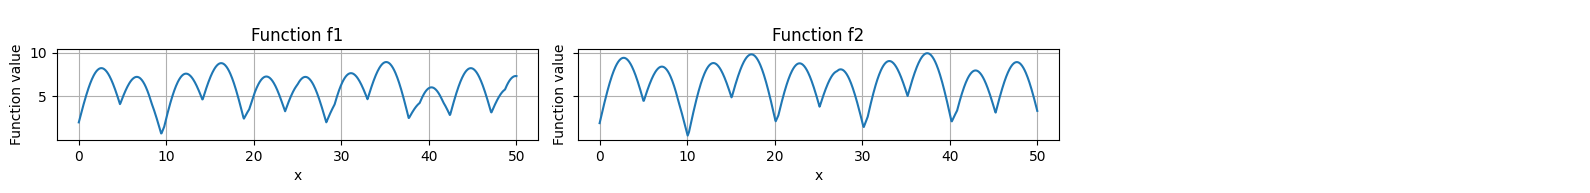

In [87]:
f = [
    # Distinct local maxima by adjusting coefficients and periods
    lambda x, p: 5 * p * abs(np.sin(x / 1.5)) + 3.2 * p * abs(np.sin(x / 3.1)) + 2.3 * p * abs(np.cos(x / 5.3)),
    
    lambda x, p: 6.1 * p * abs(np.sin(x / 1.6)) + 3.6 * p * abs(np.sin(x / 3.25)) + 2.2 * p * abs(np.cos(x / 5.75)),
]
plot(f, p)


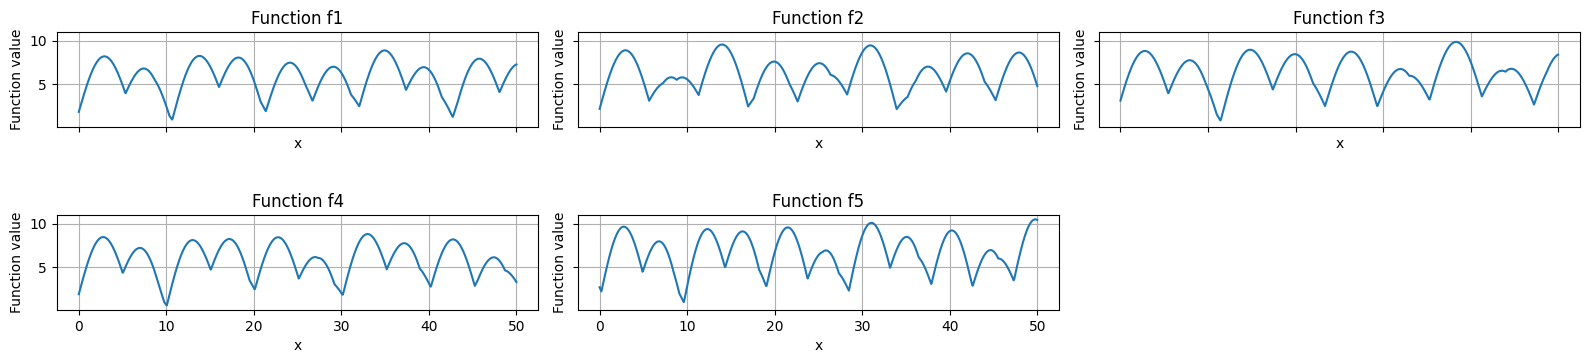

In [88]:
f = [
    # 1. Slight variation in periods and coefficients to ensure distinct maxima
    lambda x, p: 5 * p * abs(np.sin(x / 1.7)) + 3.3 * p * abs(np.sin(x / 3.3)) + 2.1 * p * abs(np.cos(x / 5.5)),

    # 2. Larger gaps between periods to ensure distinct heights and smoother transitions
    lambda x, p: 5.5 * p * abs(np.sin(x / 1.8)) + 3 * p * abs(np.sin(x / 2.8)) + 2.5 * p * abs(np.cos(x / 4.6)),

    # 3. Variation with a slight shift in one sine term to prevent overlap
    lambda x, p: 6 * p * abs(np.sin((x + 0.5) / 1.9)) + 3.2 * p * abs(np.sin(x / 3.5)) + 2 * p * abs(np.cos(x / 6.2)),

    # 4. Further adjusted coefficients and periods to create distinct maxima
    lambda x, p: 5 * p * abs(np.sin(x / 1.6)) + 3.5 * p * abs(np.sin(x / 3.1)) + 2.2 * p * abs(np.cos(x / 5.8)),

    # 5. More distinct local maxima by adjusting both sine and cosine terms
    lambda x, p: 6 * p * abs(np.sin((x - 0.2) / 1.5)) + 3.7 * p * abs(np.sin(x / 2.9)) + 2.3 * p * abs(np.cos(x / 5.4)),
]

plot(f, p)


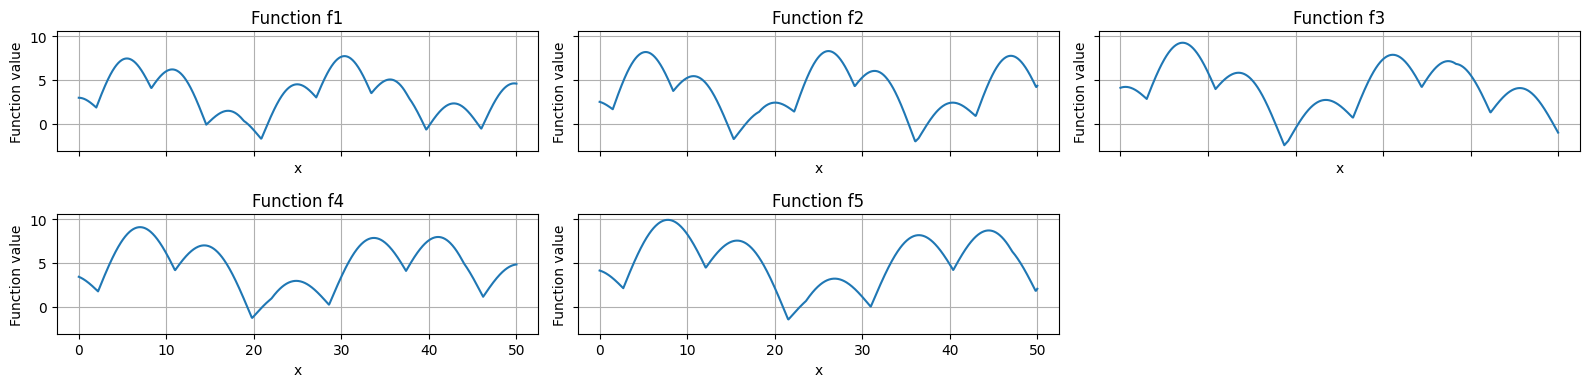

In [90]:
f = [
    # 1. A balanced combination with slightly different periods and a downward start
    lambda x, p: 4 * p * abs(np.sin((x - 2) / 2)) + 3 * p * np.sin(x / 4) + 2 * p * abs(np.sin(x / 6)),

    # 2. Similar approach with different periods for further randomness
    lambda x, p: 4.5 * p * abs(np.sin((x - 1.5) / 2.2)) + 3.2 * p * np.sin(x / 3.5) + 2.1 * p * abs(np.sin(x / 5.8)),

    # 3. Stronger shift to emphasize the downward initial motion
    lambda x, p: 5 * p * abs(np.sin((x - 3) / 2.5)) + 3.5 * p * np.sin(x / 4.5) + 2.2 * p * abs(np.sin(x / 6.1)),

    # 4. Larger gaps between maxima but keeping smooth curves between them
    lambda x, p: 5.5 * p * abs(np.sin((x - 2.2) / 2.8)) + 3 * p * np.sin(x / 5) + 2.3 * p * abs(np.sin(x / 7)),

    # 5. Further adjustments for distinct maxima and less periodicity
    lambda x, p: 6 * p * abs(np.sin((x - 2.7) / 3)) + 3.3 * p * np.sin(x / 5.5) + 2.4 * p * abs(np.sin(x / 7.5)),
]
plot(f, p)


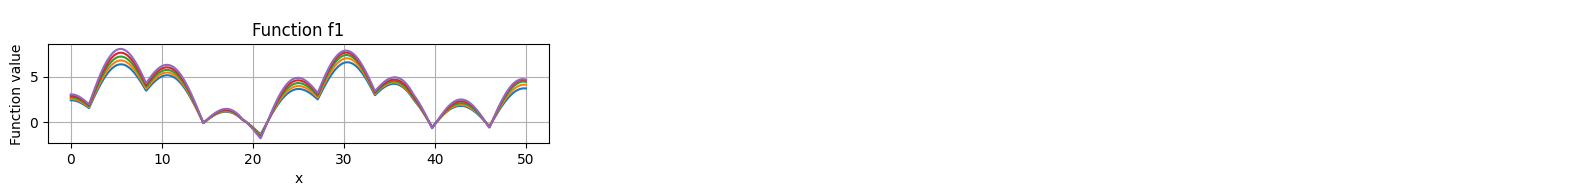

In [90]:
f = [
    # 1. A balanced combination with slightly different periods and a downward start
    lambda x, p: (4 * p * abs(np.sin((x - 2) / 2)) + 3 * p * np.sin(x / 4) + 2 * p * abs(np.sin(x / 6))) * (0.9 + (1 + np.sin(x * p / 3)) / 20),
]


# Define the p values to iterate over
p = [0.75, 0.8, 0.85, 0.9, 0.95]
# p = [0.88]

plot(f, p)


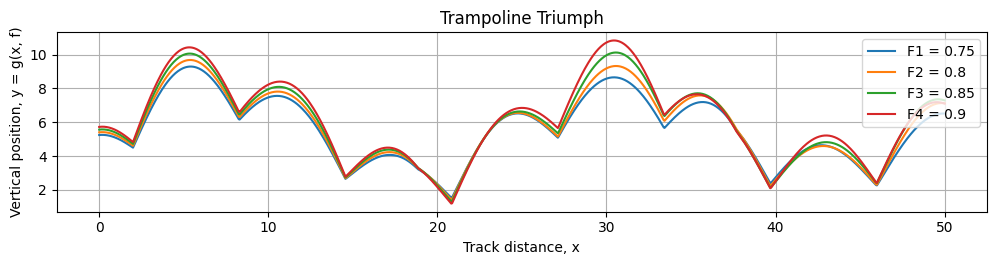

In [96]:
def plot_final(f, p):
    # Generate x values for the plot
    x = np.linspace(0, 50, 1000)

    plt.figure(figsize=(12, 6))

    for i, value in enumerate(p):
        y = f(x, value)
        plt.plot(x, y, label=f'F{i+1} = {value}')

    # Add labels and title
    plt.xlabel('Track distance, x')
    plt.ylabel('Vertical position, y = g(x, f)')
    plt.title('Trampoline Triumph')
    plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to 1:1
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    
f = lambda x, p: (3 + 4 * p * abs(np.sin((x - 2) / 2)) + 3 * p * np.sin(x / 4) + 2 * p * abs(np.sin(x / 6))) * (0.9 + (1 + np.sin(x * p / 2    plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to 1:1
    plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to 1:1
)) / 20)

# Define the p values to iterate over
p = [0.75, 0.8, 0.85, 0.9]

plot_final(f, p)